# Descriptions

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time.


type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing o
ut of the system.

**Column Value Information**

CASH-IN: Refers to depositing cash into an account, typically adding funds.

CASH-OUT: Refers to withdrawing cash from an account, usually removing funds.

DEBIT: This can have two meanings:

It can refer to a decrease in the balance of a financial account due to a withdrawal or an expense.

In accounting, it represents an entry that reduces assets or increases liabilities.

PAYMENT: Refers to the transfer of money from one party (payer) to another (payee) in exchange for goods, services, or as settlement of a debt.

TRANSFER: Refers to moving money from one account to another, often between accounts held by the same person or entity.

# Business Questions to Address:

1. What is the model's precision and accuracy in detecting fraudulent transactions?
2. How reliable is the model in classifying transactions as legitimate or fraudulent?
3. What are the potential losses due to model errors?

# Data Collection:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset.

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df=pd.read_csv('/content/drive/MyDrive/BIA/Project/CAP_STONE_PROJECT/Fraud_detection/Fraud_Analysis_Dataset.csv')

In [4]:
df=pd.read_csv('C:/Users/VIVEK PAL/BIA/Capstone_Project/Fraud_Analysis_Dataset.csv')

# 3. EDA &  Data Preprocessing(data wrangling/cleaning)

In [5]:
df.head()  #First 5 row

step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0             0.0        1  
1    C38997010         21182.0             0.0        1  
2   C972765878             0.0             0.0        1  
3  C1007251739         26202.0             0.0        1  
4  C1848415041             0.0             0.0        1

In [6]:
df.tail()  # last 5 row

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
11137     7     DEBIT    6393.71  C1331144930      433084.38       426690.68   
11138     7  CASH_OUT  298799.54   C932023579      426690.68       127891.14   
11139     7  CASH_OUT  423159.63    C61395726      127891.14            0.00   
11140     7   PAYMENT    1094.03  C1224570697       13918.00        12823.97   
11141     7   PAYMENT    9235.58  C1637966097       39963.00        30727.42   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  
11137   C684896216       478421.00       210535.25        0  
11138  C1761353343       704355.36      5270364.19        0  
11139  C1298316171       610479.00       749621.53        0  
11140   M983553548            0.00            0.00        0  
11141   M609545864            0.00            0.00        0

In [7]:
df.sample(5) # random 5 row.

step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
1774      1   CASH_IN    90340.16   C660595570     6067222.09      6157562.25   
716      61  TRANSFER  1735466.52   C182416415     1735466.52            0.00   
11102     7     DEBIT     5637.37   C292027586       30424.00        24786.63   
9862      7   PAYMENT     6858.70  C1919870671       17813.07        10954.37   
9159      7   PAYMENT     5693.58   C415511277       29541.00        23847.42   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  
1774   C1590550415     16500000.00      19200000.0        0  
716     C180492809            0.00             0.0        1  
11102   C542220524        98719.13             0.0        0  
9862   M1250154012            0.00             0.0        0  
9159     M34004511            0.00             0.0        0

In [8]:
df.shape

(11142, 10)

There are 11,142 tuples and 10 features.

In [9]:
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)

Remove the 'nameOrig' and 'nameDest' columns from the DataFrame, as they are unnecessary for analysis.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   oldbalanceOrg   11142 non-null  float64
 4   newbalanceOrig  11142 non-null  float64
 5   oldbalanceDest  11142 non-null  float64
 6   newbalanceDest  11142 non-null  float64
 7   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 696.5+ KB


1. The dataset consists of 11,142 entries with no missing values across all 8 columns.
2. There are 5 float64 columns (amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest), 2 int64 columns (step, isFraud), and 1 object column (type).
3. The type column is categorical and may require encoding for modeling.
4. The memory usage is approximately 696.5 KB, which is manageable for processing.


In [11]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  11142.000000  1.114200e+04   1.114200e+04    1.114200e+04   
mean       8.717645  2.131915e+05   9.241173e+05    8.249576e+05   
std       16.067479  7.600650e+05   2.143004e+06    2.089894e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        2.000000  4.946618e+03   4.270000e+02    0.000000e+00   
50%        6.000000  1.676126e+04   2.816950e+04    4.420605e+03   
75%        7.000000  1.543366e+05   3.040855e+05    1.114126e+05   
max       95.000000  1.000000e+07   1.990000e+07    1.300000e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.114200e+04    1.114200e+04  11142.000000  
mean     8.883541e+05    1.103211e+06      0.102495  
std      2.601376e+06    2.982447e+06      0.303312  
min      0.000000e+00    0.000000e+00      0.000000  
25%      0.000000e+00    0.000000e+00      0.000000  
50%      0.000000e+00    0.000000e+00      0.000000  
75%      2.711555e+05    3.186374e+05      0.000000  
max      3.300000e+07    3.460000e+07      1.000000

1. The dataset comprises 11,142 transactions, all of which contain complete information with no missing values.
2. The distribution of the amount feature is highly skewed, with a mean of approximately 213,000 and a median of around 16,762.
3. This indicates the presence of a few extremely large transactions.
4. Both the oldbalanceOrg and oldbalanceDest features show significant differences between their means and medians, suggesting the presence of outliers.
5. Additionally, many transactions have zero balances, which may indicate that they are associated with new or empty accounts.
6. The isFraud column reveals that approximately 10.25% of the transactions are fraudulent, which highlights a class imbalance that needs to be addressed during the modeling process.

In [12]:
 df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [13]:
df.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

1. The dataset contains a mix of numerical and categorical features:
2. 5 float64 columns: amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest (representing continuous financial data).
3. 2 int64 columns: step (time-related) and isFraud (binary target variable).
4. 1 object column: type (categorical transaction type, requiring encoding for modeling).

In [14]:
df.nunique()

step                 95
type                  5
amount            10565
oldbalanceOrg      7806
newbalanceOrig     5914
oldbalanceDest     4531
newbalanceDest     2030
isFraud               2
dtype: int64

1. step has 95 unique values, indicating transactions occurred over several time intervals.
2. type has 5 unique transaction types, which may influence fraud detection.
3. amount has 10,565 unique values, suggesting a wide range of transaction amounts.
4. Balance-related columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest) have decreasing unique values, with newbalanceDest having the least (2,030), indicating frequent repeated destinations.
5. isFraud has 2 unique values (fraudulent or not), confirming the binary nature of the target variable.

In [15]:
df.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

No missing values are present in any columns, indicating a clean dataset.

In [16]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11137    False
11138    False
11139    False
11140    False
11141    False
Length: 11142, dtype: bool

In [17]:
df.duplicated().sum()

0

The dataset contains no duplicate records, ensuring that each transaction is unique and eliminating the need for data deduplication.

In [18]:
df['isFraud'].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

This imbalance suggests that resampling techniques (e.g., oversampling, undersampling, or using specialized algorithms) may be necessary to improve the model's fraud detection capabilities.

# Feature Engineering

**Transaction Impact on Balance:**

In [19]:
df['balance_change_org']= df['oldbalanceOrg'] - df['newbalanceOrig']

In [20]:
df['balance_change_org']

0           181.00
1           181.00
2          2806.00
3          2806.00
4         20128.00
           ...    
11137      6393.70
11138    298799.54
11139    127891.14
11140      1094.03
11141      9235.58
Name: balance_change_org, Length: 11142, dtype: float64

In [21]:
df['balance_change_dest']= df['oldbalanceDest'] - df['newbalanceDest']

In [22]:
df['balance_change_dest']

0              0.00
1          21182.00
2              0.00
3          26202.00
4              0.00
            ...    
11137     267885.75
11138   -4566008.83
11139    -139142.53
11140          0.00
11141          0.00
Name: balance_change_dest, Length: 11142, dtype: float64

1. The values in the `balance_change_org` column likely indicate the amount deducted from the sender's account, while the values in the `balance_change_dest` column likely represent the amount received by the recipient.

2. Several entries have a `balance_change_dest` value of 0.00, which may indicats no updated balance for the recipient. This situation could occur if money is sent to an account not tracked in the dataset othe transaction was not completed successfullyed.

3. Some entries in the `balance_change_dest` column are negative, which is unusual. This may indicate errors in the dataset or could point to a withdrawal or fraudulent transaction where the recipient's account balance unexpectedly decreases. balance decreasesaudulent activity.

**Net Transaction Effect**

In [23]:
df['amount_ration_org'] = df['amount'] / (df['oldbalanceOrg'] + 1)  

In [24]:
df['amount_ration_org']

0        0.994505
1        0.994505
2        0.999644
3        0.999644
4        0.999950
           ...   
11137    0.014763
11138    0.700270
11139    3.308723
11140    0.078600
11141    0.231097
Name: amount_ration_org, Length: 11142, dtype: float64

1. This ratio represents how much the transaction amount (amount) contributes to the sender's original balance (oldbalanceOrg).
2. The values are mostly close to 1, indicating that in many cases, the transaction amount is nearly equal to the sender’s balance.
3. However, some outliers have values greater than 1, meaning that the transaction amount exceeds the sender’s balance. This could indicate potential fraudulent activities, overdrafts, or errors in the dataset.

In [25]:
df['amount_ration_dest'] = df['amount'] / (df['newbalanceDest']+1)

In [26]:
df['amount_ration_dest']

0          181.000000
1          181.000000
2         2806.000000
3         2806.000000
4        20128.000000
             ...     
11137        0.030369
11138        0.056694
11139        0.564497
11140     1094.030000
11141     9235.580000
Name: amount_ration_dest, Length: 11142, dtype: float64

1. This ratio represents how much the transaction amount contributes to the recipient’s new balance (newbalanceDest).
2. The values vary widely, with some extremely high values (e.g., 20128), indicating that the recipient had a very low or zero initial balance.
3. The lower values suggest that the recipient already had a substantial balance, making the incoming transaction a smaller fraction of their total balance.

1. Cases where amount_ration_org > 1 might indicate transactions where the sender did not have enough funds.
2. Cases where amount_ration_dest is significantly large (e.g., 20128) suggest transactions where the recipient's balance was initially very low.
3. These outliers could be potential indicators of fraudulent or unusual transactions and should be investigated further.

**High-Value Transactions**

In [27]:
df['high_value_txn'] = (df['amount'] > df['amount'].quantile(0.95)).astype(int)

In [28]:
df['high_value_txn']

0        0
1        0
2        0
3        0
4        0
        ..
11137    0
11138    0
11139    0
11140    0
11141    0
Name: high_value_txn, Length: 11142, dtype: int32

The majority of transactions (95%) have a high_value_txn value of 0, meaning they fall below the 95th percentile.
Only 5% of the transactions are classified as high-value (high_value_txn = 1).

In [29]:
df['high_value_txn'].unique()

array([0, 1])

In [30]:
df['high_value_txn'].value_counts()

high_value_txn
0    10585
1      557
Name: count, dtype: int64

In [31]:
df.head()

step      type   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1  TRANSFER    181.0          181.0             0.0             0.0   
1     1  CASH_OUT    181.0          181.0             0.0         21182.0   
2     1  TRANSFER   2806.0         2806.0             0.0             0.0   
3     1  CASH_OUT   2806.0         2806.0             0.0         26202.0   
4     1  TRANSFER  20128.0        20128.0             0.0             0.0   

   newbalanceDest  isFraud  balance_change_org  balance_change_dest  \
0             0.0        1               181.0                  0.0   
1             0.0        1               181.0              21182.0   
2             0.0        1              2806.0                  0.0   
3             0.0        1              2806.0              26202.0   
4             0.0        1             20128.0                  0.0   

   amount_ration_org  amount_ration_dest  high_value_txn  
0           0.994505               181.0               0  
1           0.994505               181.0               0  
2           0.999644              2806.0               0  
3           0.999644              2806.0               0  
4           0.999950             20128.0               0

# Visualization

C:\Users\VIVEK PAL\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


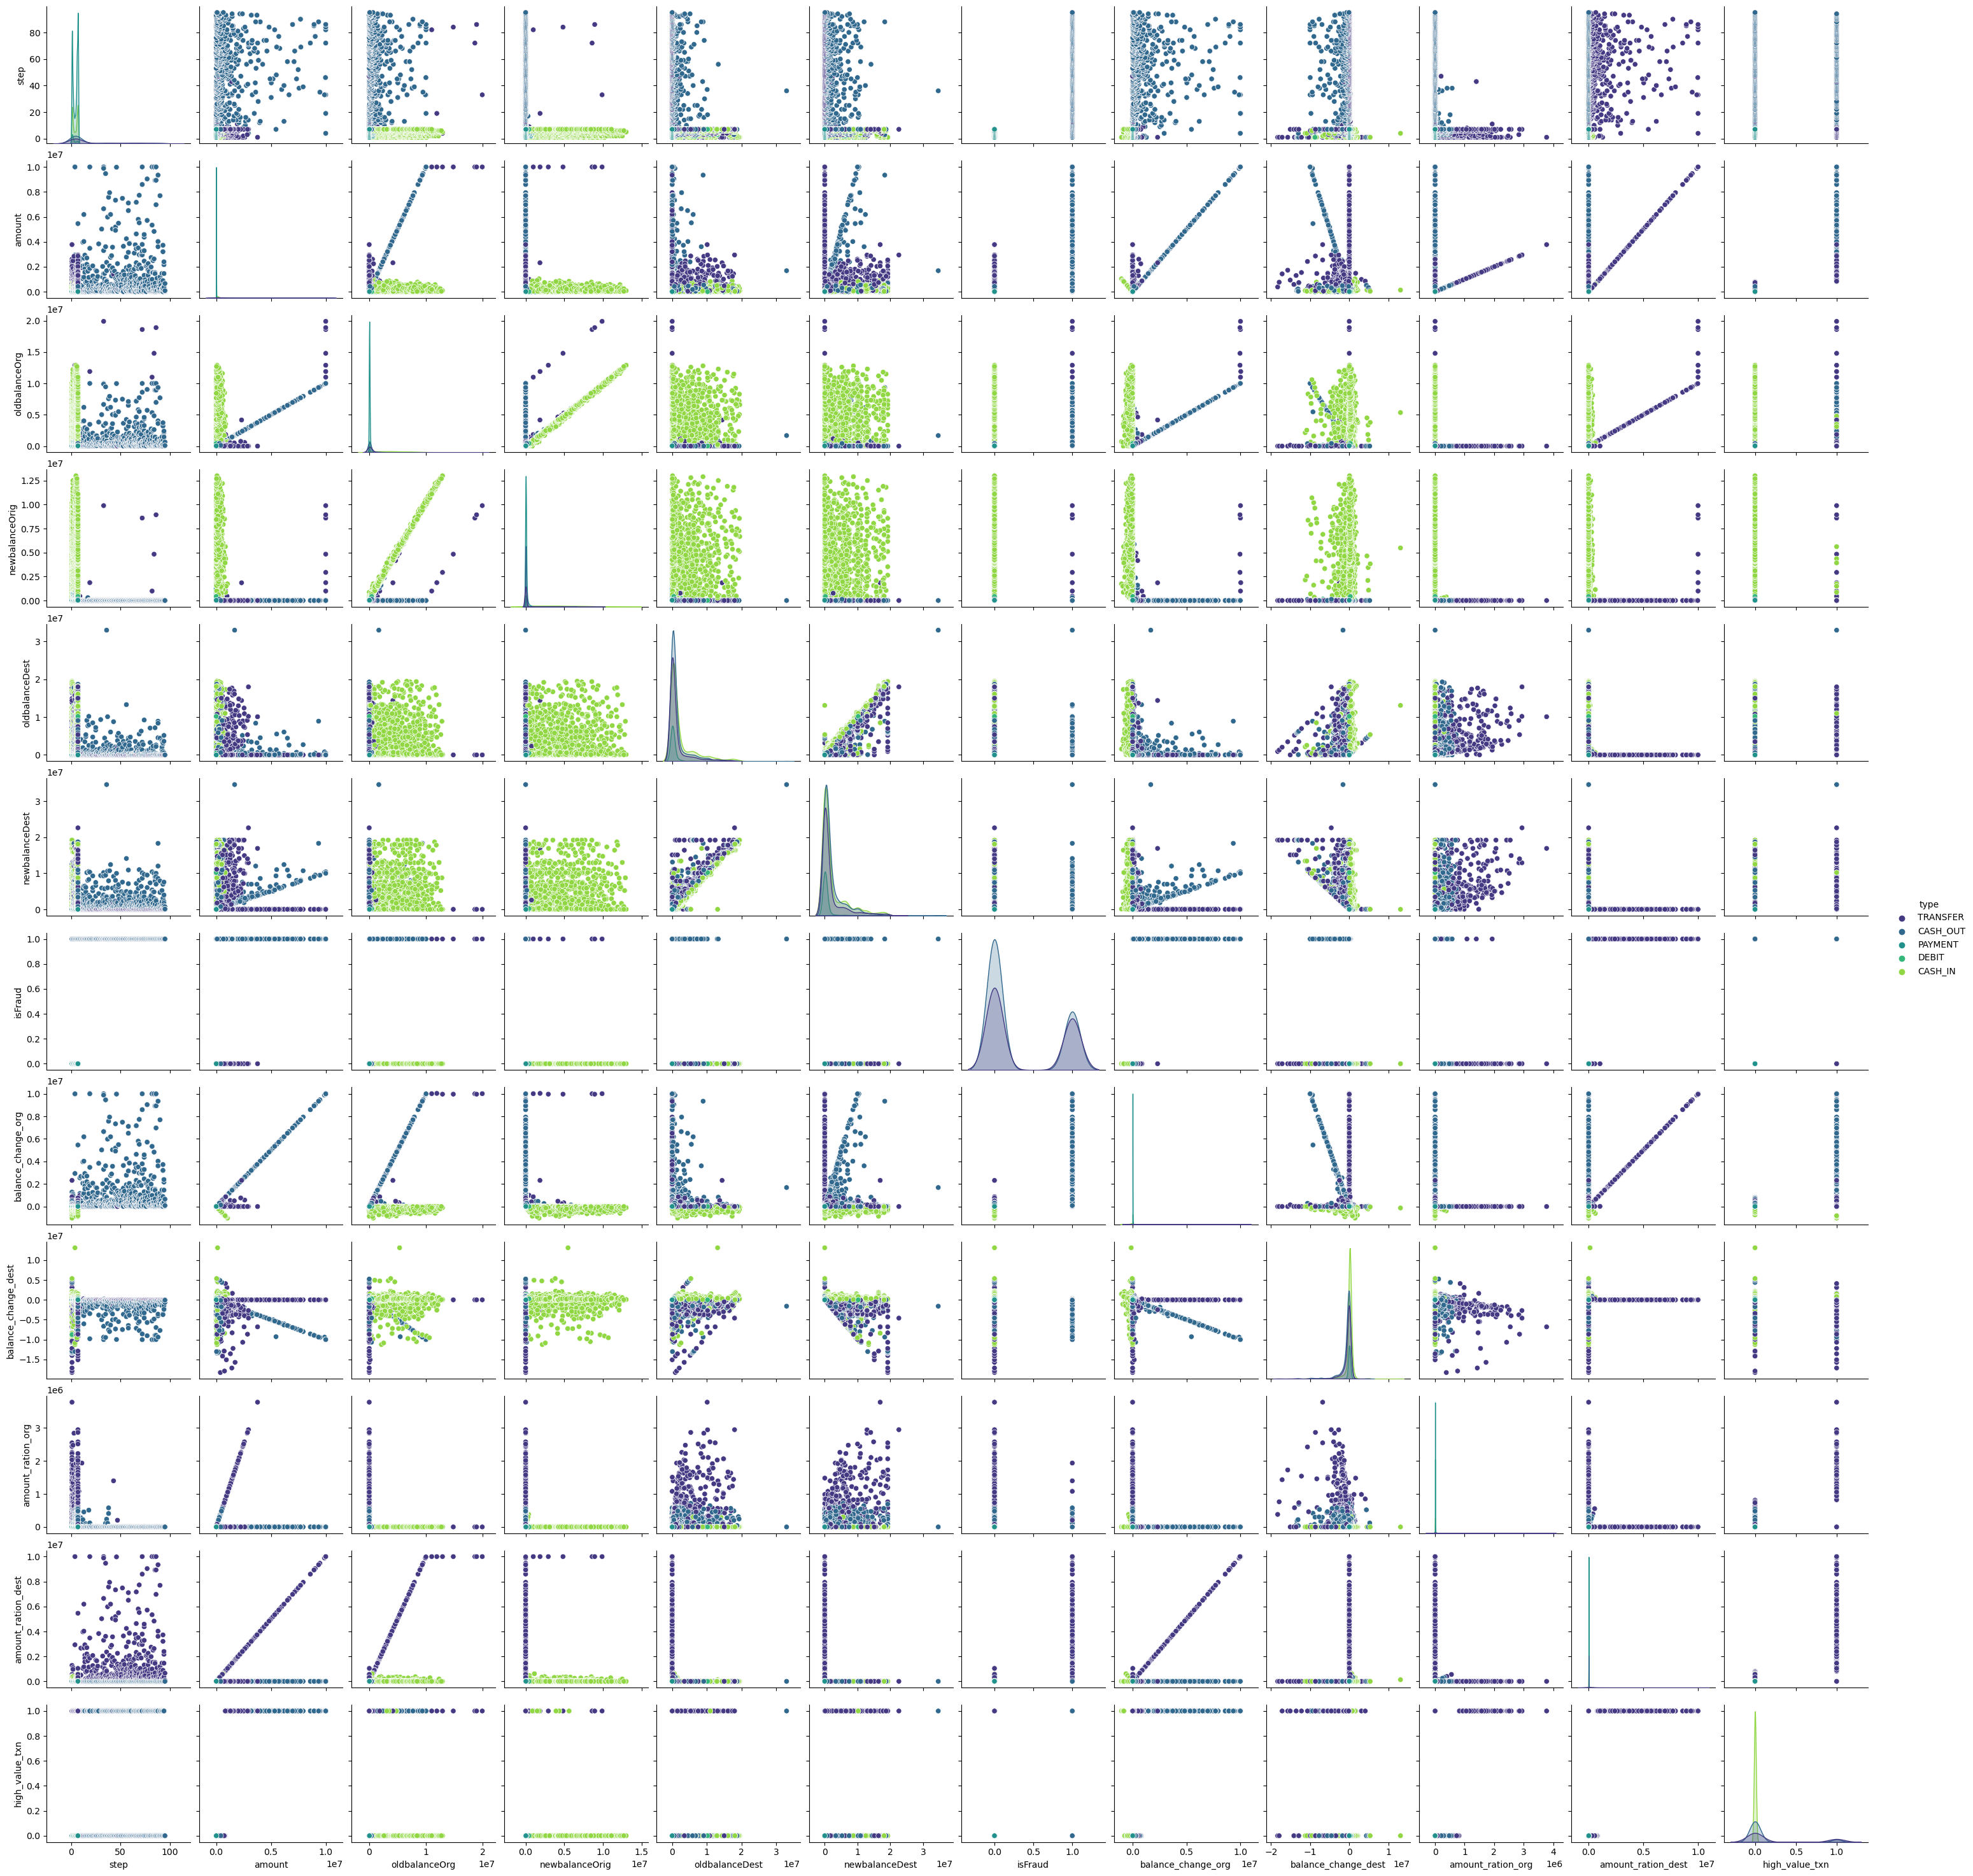

In [32]:
sns.pairplot(df,hue='type',palette='viridis' )
plt.show()


**Visualizing numerical features**

In [33]:
numerical_df = df.select_dtypes(include=['int64','float'])

In [34]:
numerical_df

step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         1     181.00         181.00            0.00            0.00   
1         1     181.00         181.00            0.00        21182.00   
2         1    2806.00        2806.00            0.00            0.00   
3         1    2806.00        2806.00            0.00        26202.00   
4         1   20128.00       20128.00            0.00            0.00   
...     ...        ...            ...             ...             ...   
11137     7    6393.71      433084.38       426690.68       478421.00   
11138     7  298799.54      426690.68       127891.14       704355.36   
11139     7  423159.63      127891.14            0.00       610479.00   
11140     7    1094.03       13918.00        12823.97            0.00   
11141     7    9235.58       39963.00        30727.42            0.00   

       newbalanceDest  isFraud  balance_change_org  balance_change_dest  \
0                0.00        1              181.00                 0.00   
1                0.00        1              181.00             21182.00   
2                0.00        1             2806.00                 0.00   
3                0.00        1             2806.00             26202.00   
4                0.00        1            20128.00                 0.00   
...               ...      ...                 ...                  ...   
11137       210535.25        0             6393.70            267885.75   
11138      5270364.19        0           298799.54          -4566008.83   
11139       749621.53        0           127891.14           -139142.53   
11140            0.00        0             1094.03                 0.00   
11141            0.00        0             9235.58                 0.00   

       amount_ration_org  amount_ration_dest  
0               0.994505          181.000000  
1               0.994505          181.000000  
2               0.999644         2806.000000  
3               0.999644         2806.000000  
4               0.999950        20128.000000  
...                  ...                 ...  
11137           0.014763            0.030369  
11138           0.700270            0.056694  
11139           3.308723            0.564497  
11140           0.078600         1094.030000  
11141           0.231097         9235.580000  

[11142 rows x 11 columns]

<Axes: xlabel='step', ylabel='Count'>

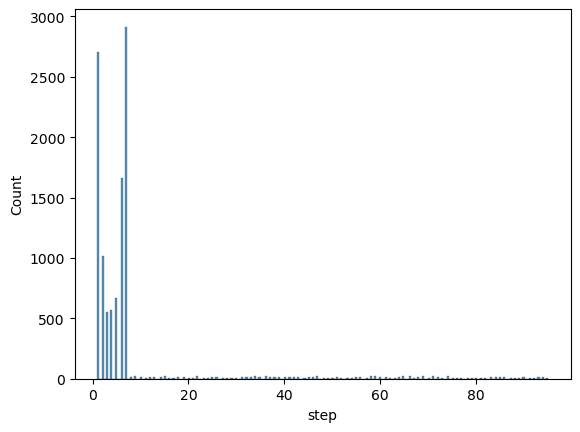

In [35]:
sns.histplot(x='step',data=numerical_df)

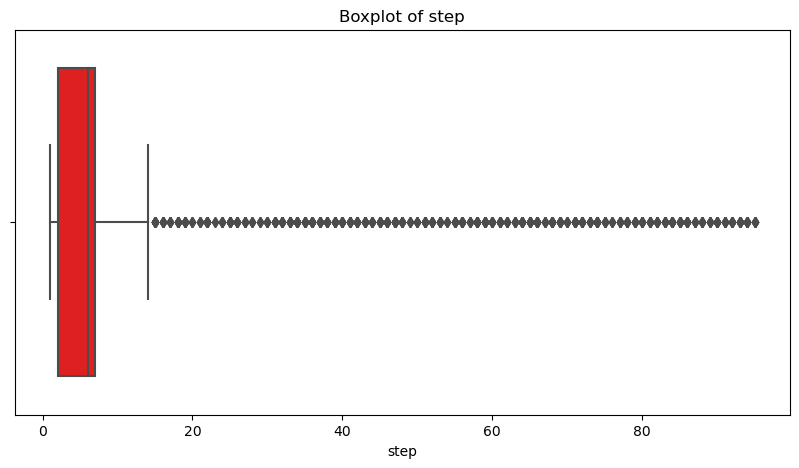

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['step'], color='red')

plt.title('Boxplot of step')
plt.show()

<Axes: xlabel='amount', ylabel='Count'>

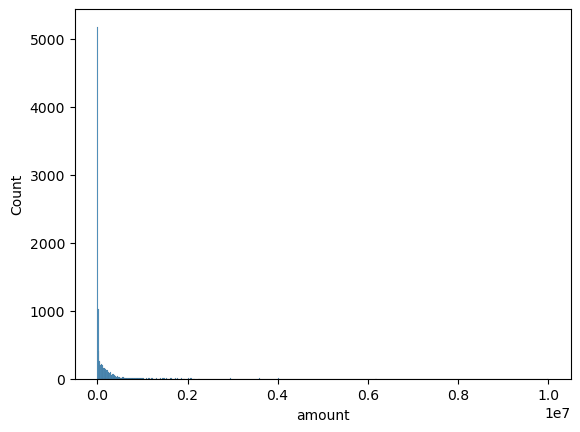

In [37]:
sns.histplot(x=df['amount'])

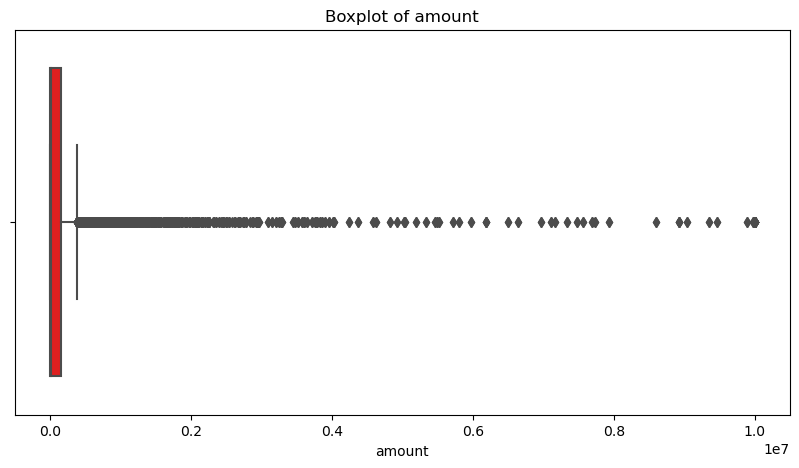

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['amount'], color='red')
plt.title('Boxplot of amount')
plt.show()

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

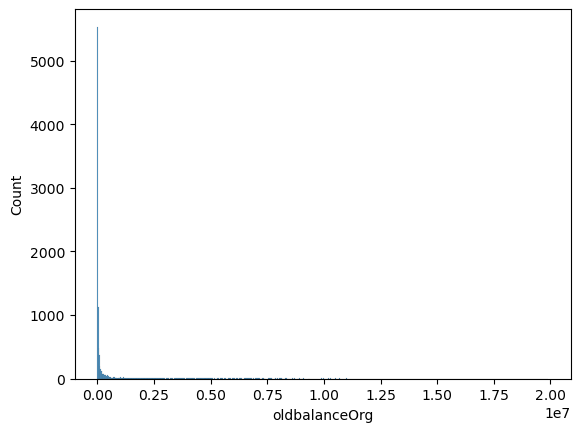

In [39]:
sns.histplot(x=df['oldbalanceOrg'])

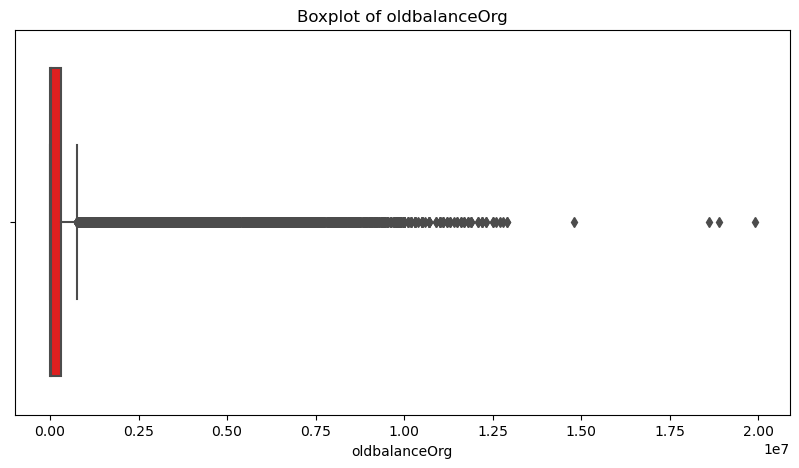

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['oldbalanceOrg'], color='red')
plt.title('Boxplot of oldbalanceOrg')
plt.show()

<Axes: xlabel='newbalanceOrig', ylabel='Count'>

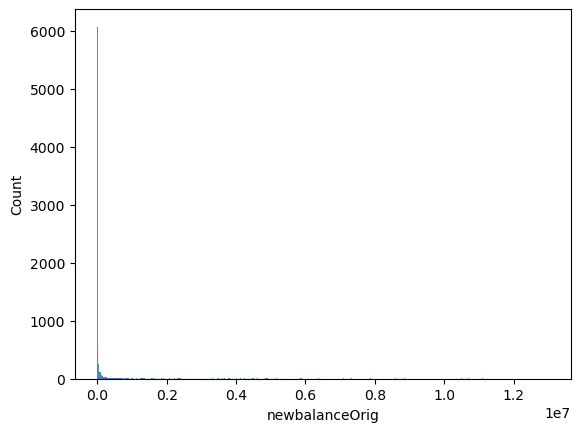

In [41]:
sns.histplot(x=df['newbalanceOrig'])

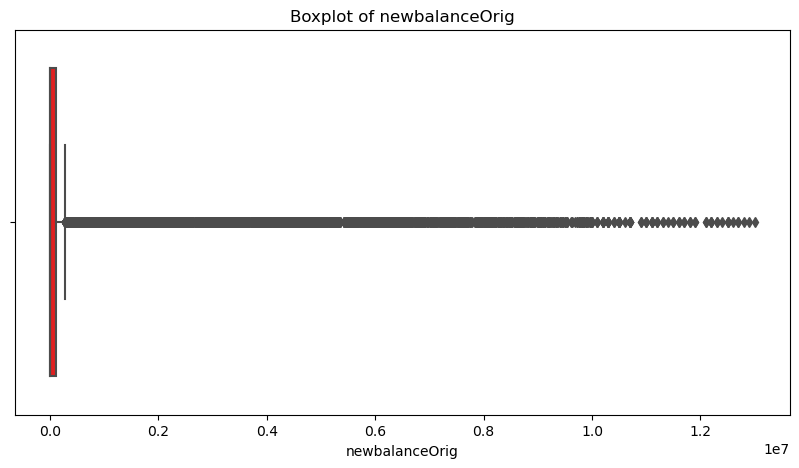

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['newbalanceOrig'], color='red')
plt.title('Boxplot of newbalanceOrig')
plt.show()


<Axes: xlabel='oldbalanceDest', ylabel='Count'>

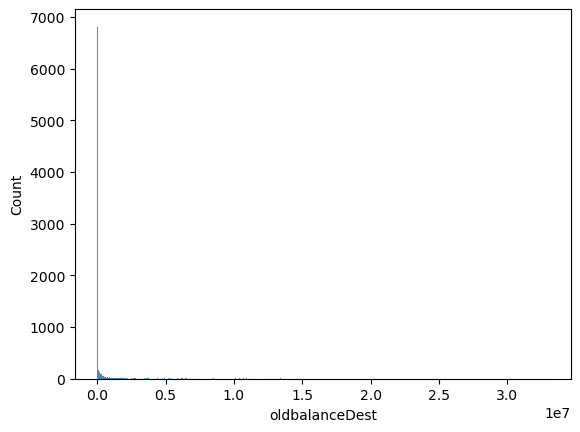

In [43]:
sns.histplot(x=df['oldbalanceDest'])

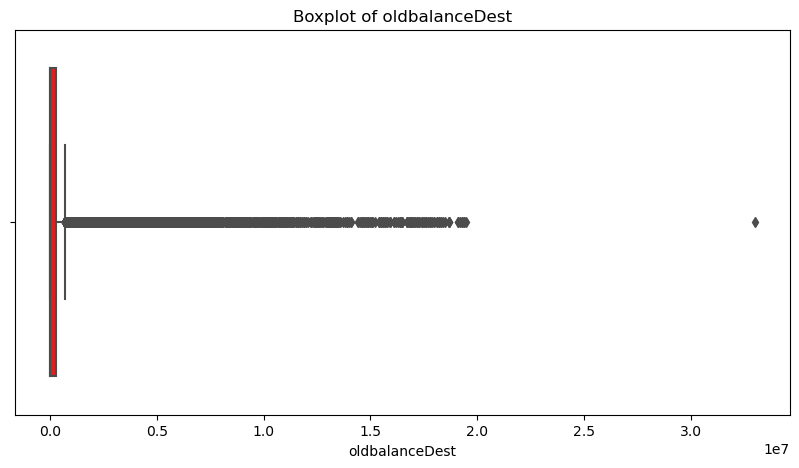

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['oldbalanceDest'], color='red')
plt.title('Boxplot of oldbalanceDest')
plt.show()

<Axes: xlabel='newbalanceDest', ylabel='Count'>

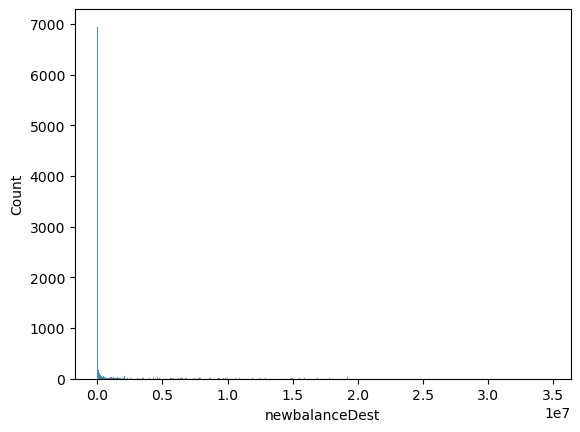

In [45]:
sns.histplot(x=df['newbalanceDest'])

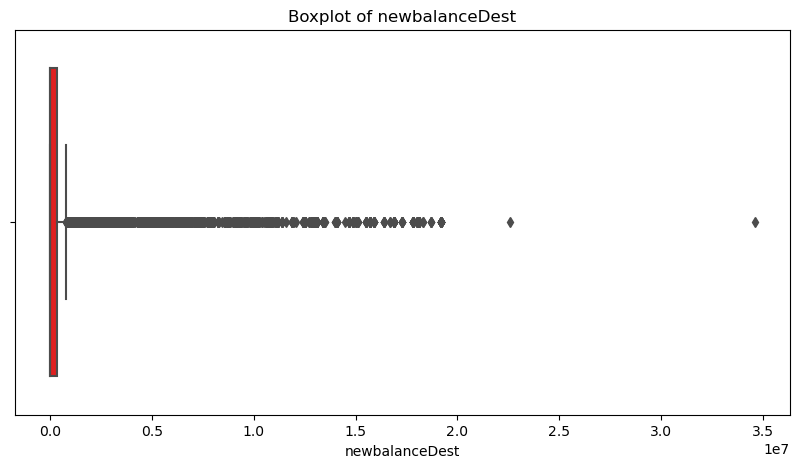

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['newbalanceDest'], color='red')
plt.title('Boxplot of newbalanceDest')
plt.show()

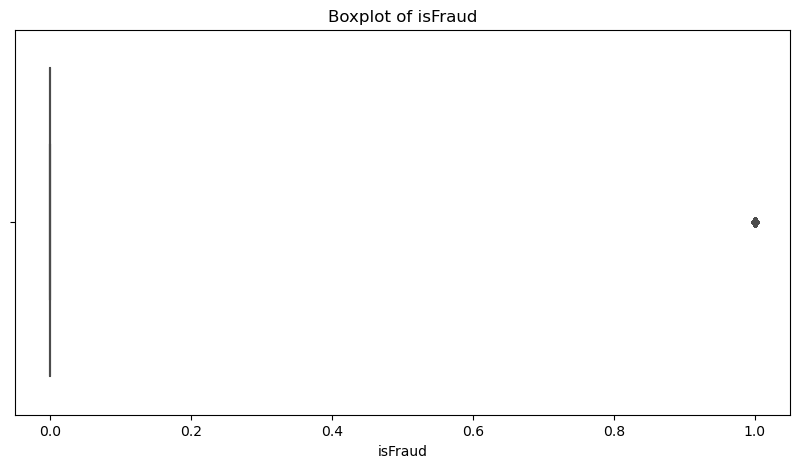

In [47]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['isFraud'], color='red')
plt.title('Boxplot of isFraud')
plt.show()

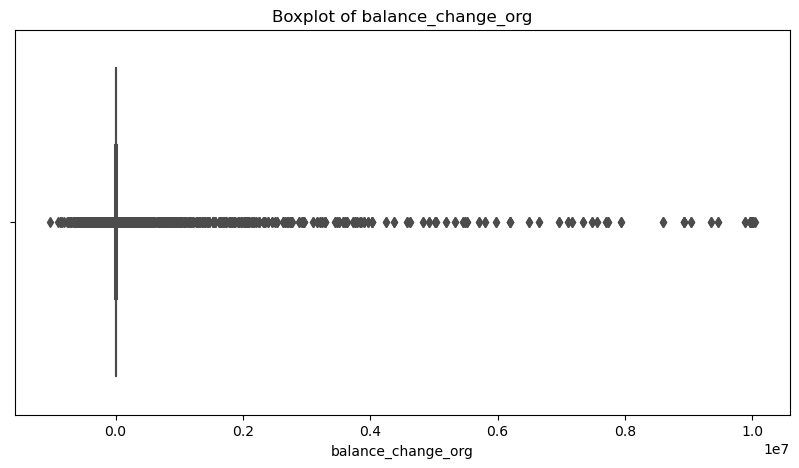

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['balance_change_org'], color='red')
plt.title('Boxplot of balance_change_org')
plt.show()

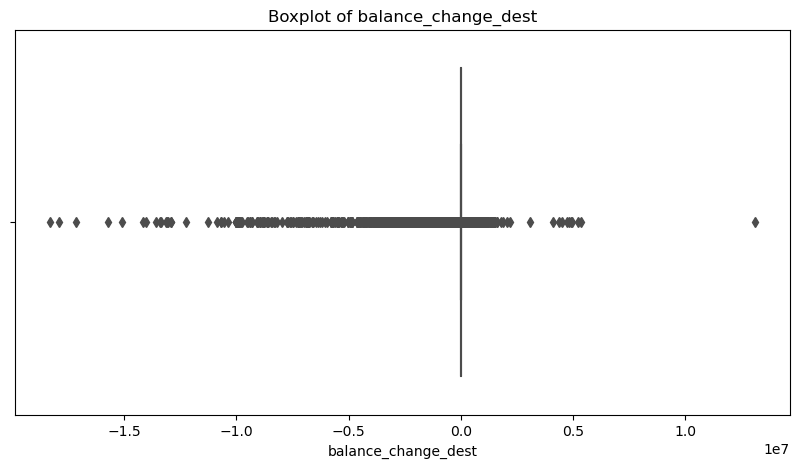

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['balance_change_dest'], color='red')
plt.title('Boxplot of balance_change_dest')
plt.show()

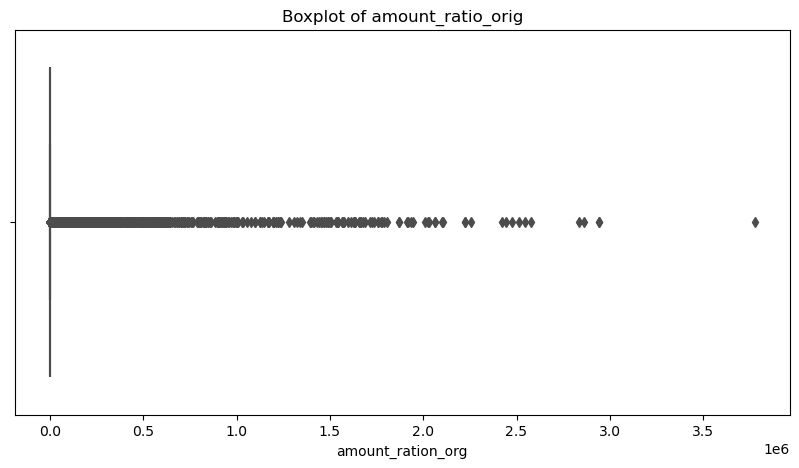

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['amount_ration_org'], color='red')
plt.title('Boxplot of amount_ratio_orig')
plt.show()

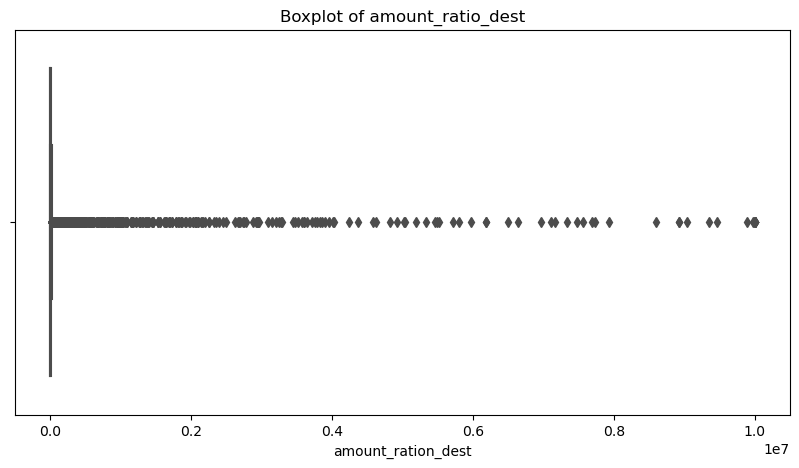

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['amount_ration_dest'], color='red')
plt.title('Boxplot of amount_ratio_dest')
plt.show()

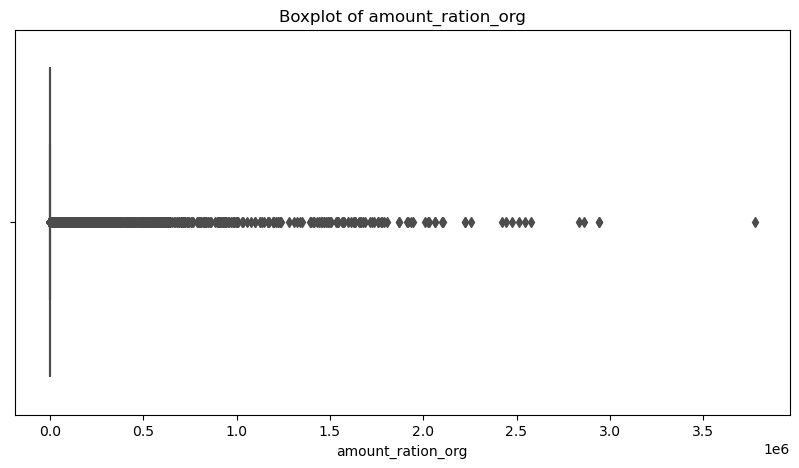

In [52]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['amount_ration_org'], color='red')
plt.title('Boxplot of amount_ration_org')
plt.show()


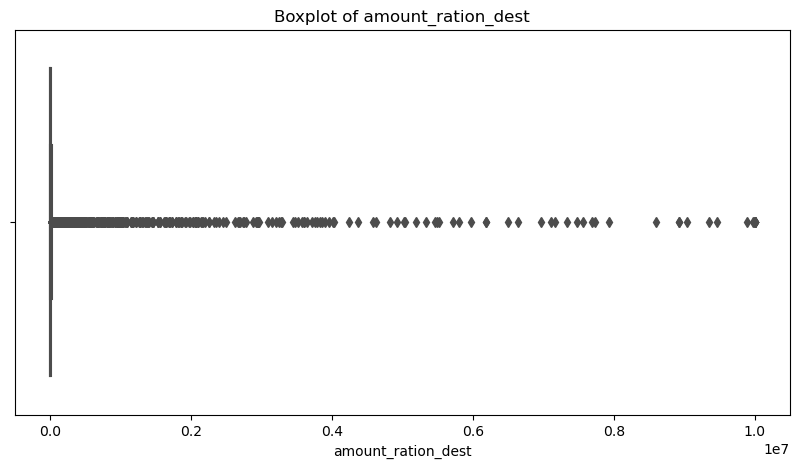

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['amount_ration_dest'], color='red')
plt.title('Boxplot of amount_ration_dest')
plt.show()

<Axes: xlabel='isFraud', ylabel='count'>

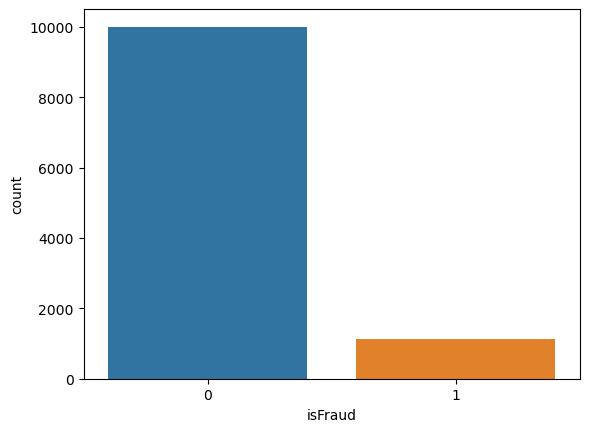

In [54]:
sns.countplot(x=df['isFraud'])

**Visualizing Categorical features**

In [55]:
categorical_df=df.select_dtypes('object')

In [56]:
categorical_df

type
0      TRANSFER
1      CASH_OUT
2      TRANSFER
3      CASH_OUT
4      TRANSFER
...         ...
11137     DEBIT
11138  CASH_OUT
11139  CASH_OUT
11140   PAYMENT
11141   PAYMENT

[11142 rows x 1 columns]

<Axes: title={'center': 'Transaction Mode'}, xlabel='type', ylabel='count'>

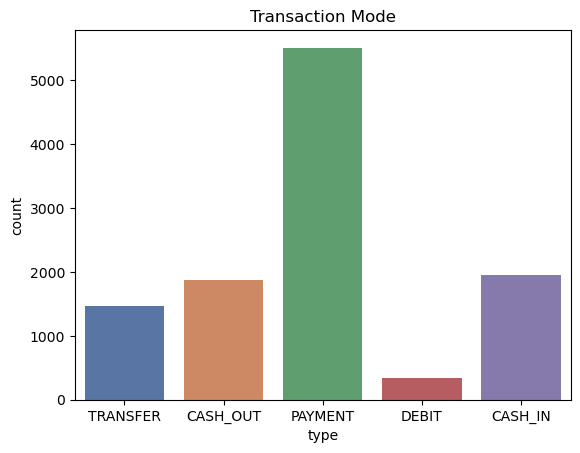

In [57]:
plt.title('Transaction Mode')
sns.countplot(x=df['type'],palette='deep')

1. `Dominance of "PAYMENT" Transactions`: "PAYMENT" is the most frequent transaction type, significantly outnumbering other types. This suggests that a large portion of financial activity in this dataset involves payments.
2. `Moderate Frequency of "CASH_OUT" and "CASH_IN"`: These transaction types occur at a relatively similar rate, indicating a balanced cash flow in and out of accounts.
3. `Lower Occurrence of "TRANSFER"`: "TRANSFER" transactions happen less frequently than "CASH_OUT" and "CASH_IN," implying that direct money transfers are not as common.
4. `Least Common Transaction - "DEBIT"`: "DEBIT" transactions appear the least, suggesting that this method of transaction is rarely used.

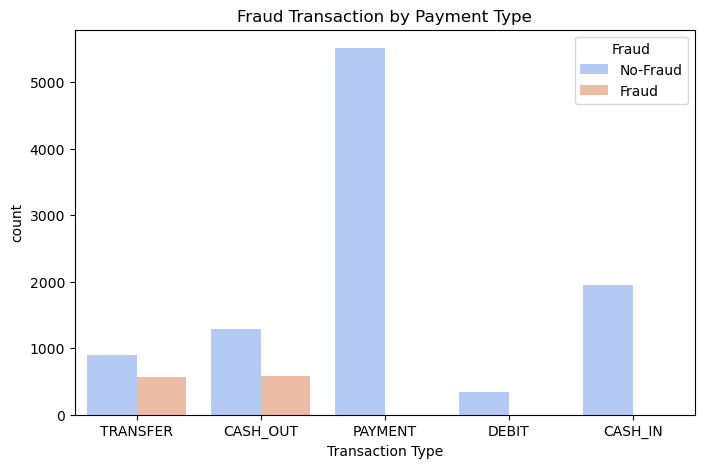

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['type'],hue=df['isFraud'],palette='coolwarm')
plt.title('Fraud Transaction by Payment Type')
plt.xlabel('Transaction Type')
plt.ylabel('count')
plt.legend(title='Fraud',labels=['No-Fraud','Fraud'])
plt.show()

Fraud is Most Common in "TRANSFER" and "CASH_OUT": The majority of fraudulent transactions occur in these two categories, indicating that fraudsters prefer these transaction types to move money.
"PAYMENT" Transactions Have Almost No Fraud: Despite being the most frequent transaction type, "PAYMENT" transactions have very few fraud cases, suggesting they are relatively safe.
Low Fraud in "DEBIT" and "CASH_IN": These transaction types show minimal fraud cases, making them less risky compared to "TRANSFER" and "CASH_OUT."
Focus on High-Risk Transactions: Fraud detection models should prioritize monitoring "TRANSFER" and "CASH_OUT" transactions to reduce fraudulent activities.

# Encode Categorical feature

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
df['type']=le.fit_transform(df['type'])

In [62]:
df['type']

0        4
1        1
2        4
3        1
4        4
        ..
11137    2
11138    1
11139    1
11140    3
11141    3
Name: type, Length: 11142, dtype: int32

In [63]:
df['type'].value_counts()

type
3    5510
0    1951
1    1871
4    1464
2     346
Name: count, dtype: int64

In [64]:
corr_matrix=df.corr()

In [65]:
corr_matrix

step      type    amount  oldbalanceOrg  \
step                 1.000000  0.056299  0.421846       0.056078   
type                 0.056299  1.000000  0.012834      -0.547431   
amount               0.421846  0.012834  1.000000       0.323943   
oldbalanceOrg        0.056078 -0.547431  0.323943       1.000000   
newbalanceOrig      -0.110430 -0.596958 -0.007816       0.937024   
oldbalanceDest      -0.043655 -0.276225  0.094117       0.207628   
newbalanceDest       0.006122 -0.251018  0.227413       0.209787   
isFraud              0.831961  0.060540  0.435490       0.046445   
balance_change_org   0.466122  0.098856  0.943694       0.245337   
balance_change_dest -0.117925  0.026912 -0.387728      -0.076543   
amount_ration_org   -0.055813  0.115418  0.200226      -0.092905   
amount_ration_dest   0.322271  0.145321  0.670188       0.230474   
high_value_txn       0.414723  0.116797  0.714484       0.142265   

                     newbalanceOrig  oldbalanceDest  newbalanceDest   isFraud  \
step                      -0.110430       -0.043655        0.006122  0.831961   
type                      -0.596958       -0.276225       -0.251018  0.060540   
amount                    -0.007816        0.094117        0.227413  0.435490   
oldbalanceOrg              0.937024        0.207628        0.209787  0.046445   
newbalanceOrig             1.000000        0.234148        0.190314 -0.127912   
oldbalanceDest             0.234148        1.000000        0.928831 -0.056575   
newbalanceDest             0.190314        0.928831        1.000000 -0.002864   
isFraud                   -0.127912       -0.056575       -0.002864  1.000000   
balance_change_org        -0.108705       -0.058966        0.068848  0.487231   
balance_change_dest        0.037130       -0.151018       -0.506525 -0.124020   
amount_ration_org         -0.084922        0.300904        0.370970 -0.059442   
amount_ration_dest        -0.013146       -0.042661       -0.047019  0.331088   
high_value_txn            -0.078871        0.108326        0.215718  0.446616   

                     balance_change_org  balance_change_dest  \
step                           0.466122            -0.117925   
type                           0.098856             0.026912   
amount                         0.943694            -0.387728   
oldbalanceOrg                  0.245337            -0.076543   
newbalanceOrig                -0.108705             0.037130   
oldbalanceDest                -0.058966            -0.151018   
newbalanceDest                 0.068848            -0.506525   
isFraud                        0.487231            -0.124020   
balance_change_org             1.000000            -0.320916   
balance_change_dest           -0.320916             1.000000   
amount_ration_org             -0.028709            -0.289519   
amount_ration_dest             0.692459             0.026171   
high_value_txn                 0.623831            -0.323460   

                     amount_ration_org  amount_ration_dest  high_value_txn  
step                         -0.055813            0.322271        0.414723  
type                          0.115418            0.145321        0.116797  
amount                        0.200226            0.670188        0.714484  
oldbalanceOrg                -0.092905            0.230474        0.142265  
newbalanceOrig               -0.084922           -0.013146       -0.078871  
oldbalanceDest                0.300904           -0.042661        0.108326  
newbalanceDest                0.370970           -0.047019        0.215718  
isFraud                      -0.059442            0.331088        0.446616  
balance_change_org           -0.028709            0.692459        0.623831  
balance_change_dest          -0.289519            0.026171       -0.323460  
amount_ration_org             1.000000           -0.026057        0.380905  
amount_ration_dest           -0.026057            1.000000        0.431594  
high_value_txn                0.380905 

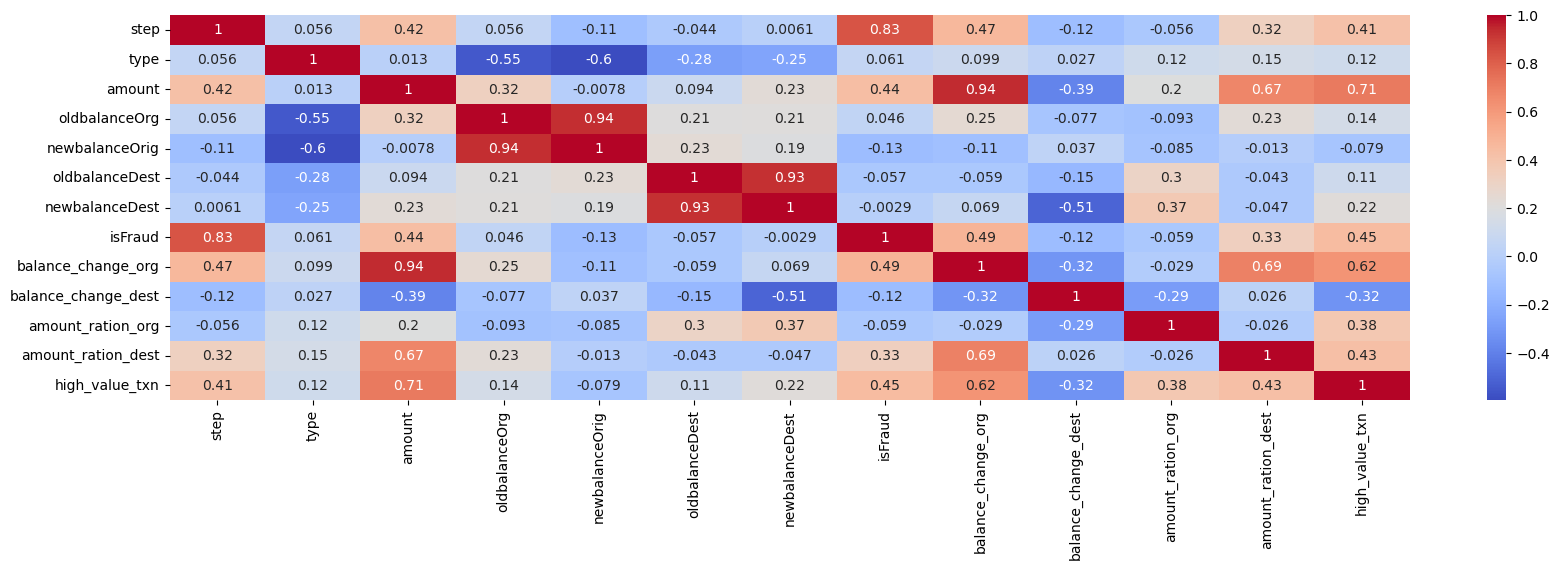

In [66]:
plt.figure(figsize=(20,5))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


 Here are some key insights:

Strong Correlation with Fraud (isFraud):
1. step has a high positive correlation (0.83) with fraud, suggesting fraud occurrences increase over time.
2. amount is moderately correlated (0.44) with fraud, indicating fraudulent transactions tend to involve significant amounts.
3. balance_change_org (0.49) and high_value_txn (0.45) are also correlated, meaning fraud is associated with large balance changes.

Highly Correlated Features (Multicollinearity):
1. oldbalanceOrg and newbalanceOrg (0.94) → If both are used in a model, one might be redundant.
2. oldbalanceDest and newbalanceDest (0.93) → Similar redundancy risk.
3. amount_ratio_dest and amount_ratio_org (0.86) → These are highly correlated, so keeping both may not add much value.


Balance Change Observations:
1. balance_change_org and amount (0.94) → Strong correlation, indicating that fraud often involves large outgoing amounts.
2. balance_change_dest has a weak negative correlation with fraud (-0.12), suggesting that destination balance changes are not as indicative of fraud.


# Dividing the data into X and y

In [67]:
X=df.drop(columns='isFraud')
X

step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         1     4     181.00         181.00            0.00            0.00   
1         1     1     181.00         181.00            0.00        21182.00   
2         1     4    2806.00        2806.00            0.00            0.00   
3         1     1    2806.00        2806.00            0.00        26202.00   
4         1     4   20128.00       20128.00            0.00            0.00   
...     ...   ...        ...            ...             ...             ...   
11137     7     2    6393.71      433084.38       426690.68       478421.00   
11138     7     1  298799.54      426690.68       127891.14       704355.36   
11139     7     1  423159.63      127891.14            0.00       610479.00   
11140     7     3    1094.03       13918.00        12823.97            0.00   
11141     7     3    9235.58       39963.00        30727.42            0.00   

       newbalanceDest  balance_change_org  balance_change_dest  \
0                0.00              181.00                 0.00   
1                0.00              181.00             21182.00   
2                0.00             2806.00                 0.00   
3                0.00             2806.00             26202.00   
4                0.00            20128.00                 0.00   
...               ...                 ...                  ...   
11137       210535.25             6393.70            267885.75   
11138      5270364.19           298799.54          -4566008.83   
11139       749621.53           127891.14           -139142.53   
11140            0.00             1094.03                 0.00   
11141            0.00             9235.58                 0.00   

       amount_ration_org  amount_ration_dest  high_value_txn  
0               0.994505          181.000000               0  
1               0.994505          181.000000               0  
2               0.999644         2806.000000               0  
3               0.999644         2806.000000               0  
4               0.999950        20128.000000               0  
...                  ...                 ...             ...  
11137           0.014763            0.030369               0  
11138           0.700270            0.056694               0  
11139           3.308723            0.564497               0  
11140           0.078600         1094.030000               0  
11141           0.231097         9235.580000               0  

[11142 rows x 12 columns]

In [68]:
X

step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         1     4     181.00         181.00            0.00            0.00   
1         1     1     181.00         181.00            0.00        21182.00   
2         1     4    2806.00        2806.00            0.00            0.00   
3         1     1    2806.00        2806.00            0.00        26202.00   
4         1     4   20128.00       20128.00            0.00            0.00   
...     ...   ...        ...            ...             ...             ...   
11137     7     2    6393.71      433084.38       426690.68       478421.00   
11138     7     1  298799.54      426690.68       127891.14       704355.36   
11139     7     1  423159.63      127891.14            0.00       610479.00   
11140     7     3    1094.03       13918.00        12823.97            0.00   
11141     7     3    9235.58       39963.00        30727.42            0.00   

       newbalanceDest  balance_change_org  balance_change_dest  \
0                0.00              181.00                 0.00   
1                0.00              181.00             21182.00   
2                0.00             2806.00                 0.00   
3                0.00             2806.00             26202.00   
4                0.00            20128.00                 0.00   
...               ...                 ...                  ...   
11137       210535.25             6393.70            267885.75   
11138      5270364.19           298799.54          -4566008.83   
11139       749621.53           127891.14           -139142.53   
11140            0.00             1094.03                 0.00   
11141            0.00             9235.58                 0.00   

       amount_ration_org  amount_ration_dest  high_value_txn  
0               0.994505          181.000000               0  
1               0.994505          181.000000               0  
2               0.999644         2806.000000               0  
3               0.999644         2806.000000               0  
4               0.999950        20128.000000               0  
...                  ...                 ...             ...  
11137           0.014763            0.030369               0  
11138           0.700270            0.056694               0  
11139           3.308723            0.564497               0  
11140           0.078600         1094.030000               0  
11141           0.231097         9235.580000               0  

[11142 rows x 12 columns]

In [69]:
y=df['isFraud']

In [70]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11137    0
11138    0
11139    0
11140    0
11141    0
Name: isFraud, Length: 11142, dtype: int64

# Oversample

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
smote = SMOTE(random_state=142)

In [73]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [74]:
y.value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

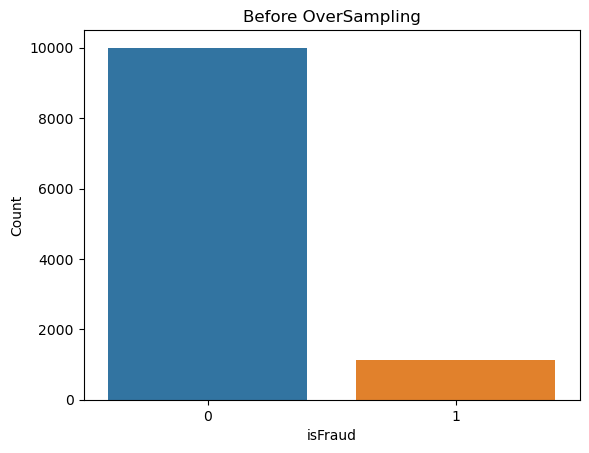

In [75]:
plt.title("Before OverSampling")
sns.countplot(x=df['isFraud'])
plt.xlabel('isFraud')  
plt.ylabel('Count')  
plt.show()

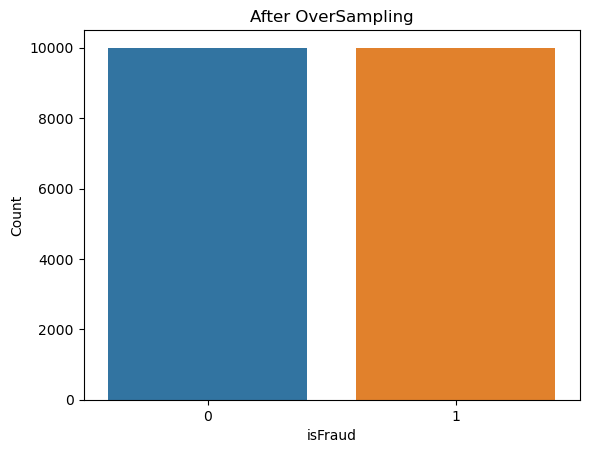

In [76]:
 plt.title("After OverSampling")  
sns.countplot(x=y_resampled)    
plt.xlabel('isFraud')  
plt.ylabel('Count')  
plt.show()  

In [77]:
y_resampled.value_counts()

isFraud
1    10000
0    10000
Name: count, dtype: int64

# Spliting the data into train_test_split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=142,stratify=y_resampled)

In [80]:
print(X_resampled_train)

       step  type        amount  oldbalanceOrg  newbalanceOrig  \
16155    39     1  5.828373e+05   5.828373e+05            0.00   
16922    48     4  4.472669e+05   4.472669e+05            0.00   
7712      6     0  4.202698e+05   3.232943e+05       743564.17   
9691      7     0  2.647881e+05   8.368635e+06      8633422.98   
13450    60     1  9.941936e+05   9.941936e+05            0.00   
...     ...   ...           ...            ...             ...   
15266    70     1  1.871528e+06   1.871528e+06            0.00   
13351    13     1  4.936195e+04   4.936195e+04            0.00   
18471     1     3  1.804507e+02   1.804507e+02            0.00   
2275      1     2  1.668110e+03   1.080000e+03            0.00   
10338     7     3  1.322250e+03   1.054790e+05       104156.75   

       oldbalanceDest  newbalanceDest  balance_change_org  \
16155   355653.100796    9.384904e+05        5.828373e+05   
16922        0.000000    0.000000e+00        4.472669e+05   
7712    536621.220000   

In [81]:
X_resampled_train.shape

(14000, 12)

In [82]:
X_resampled_test.shape

(6000, 12)

In [83]:
y_resampled_train.shape

(14000,)

In [84]:
y_resampled_test.shape

(6000,)

In [85]:
y_resampled.value_counts()

isFraud
1    10000
0    10000
Name: count, dtype: int64

# Feature Scale

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler=StandardScaler()

In [88]:
X_resampled_train = scaler.fit_transform(X_resampled_train)

In [89]:
X_resampled_test=scaler.fit_transform(X_resampled_test)

# Model Selection

```In this problem, I have a target feature, so it is a supervised learning problem.

1. The target feature, isFraud, consists of binary classes, so I will use `logistic regression`. This method is suitable because it helps find the best fit line between the two values.

2. `Support Vector Machines (SVMs)` are effective in high-dimensional spaces and are robust against overfitting, especially in situations where there are clear separation margins between classes.
3.  A `Decision Tree` is a simple yet powerful model that splits data into branches based on feature conditions. It is easy to interpret and can capture complex decision boundaries. 

4. Ensemble Method: As an ensemble of decision trees, `Random Forest` improves predictive accuracy and helps control overfitting. It builds multiple decision trees during training and combines their predictions.

5. `Gradient Boosting` is a powerful ensemble learning technique that builds multiple weak decision trees sequentially, with each tree correcting the errors of the previous one. It improves predictive accuracy by minimizing errors step by step. While highly effective in detecting fraud,```

# Model Creation For Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
logi=LogisticRegression(random_state=142)

In [92]:
logi.fit(X_resampled_train,y_resampled_train)

LogisticRegression(random_state=142)

In [93]:
import joblib

In [94]:
joblib.dump(logi,'logistic_model.pkl')

['logistic_model.pkl']

In [95]:
log_reg_model = joblib.load("logistic_model.pkl")

`Prediction`

In [96]:
slope = logi.coef_

In [97]:
slope

array([[12.43905079, -0.53415883, -0.69441571,  0.60658644, -5.56544573,
        -0.29513006, -0.21290812,  6.77111901, -0.05810076, -0.2055747 ,
         2.49909955,  0.46593894]])

In [98]:
intercept = logi.intercept_

In [99]:
intercept

array([8.63859387])

In [100]:
y_pred_logi = logi.predict(X_resampled_test)

In [101]:
y_pred_logi

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
Result=pd.DataFrame({'Actual':y_resampled_test,
                    'Predicted':y_pred_logi})

In [103]:
Result

Actual  Predicted
15721       1          1
18886       1          1
8204        0          0
773         1          1
18862       1          1
...       ...        ...
18602       1          1
717         1          1
15758       1          1
4584        0          0
6430        0          0

[6000 rows x 2 columns]

`Model Evaluation`

In [104]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [105]:
print(f'Confusion Matrix is: \n {confusion_matrix(y_resampled_test,y_pred_logi)}')

Confusion Matrix is: 
 [[2998    2]
 [ 149 2851]]


In [106]:
print(f'Accuracy Score is : {accuracy_score(y_resampled_test,y_pred_logi)*100:.2f}')

Accuracy Score is : 97.48


In [107]:
print(f'Recall Score is : {recall_score(y_resampled_test,y_pred_logi)*100:.2f}')

Recall Score is : 95.03


In [108]:
print(f'Precision score is: {precision_score(y_resampled_test,y_pred_logi)*100:.2f}')

Precision score is: 99.93


In [109]:
print(f'f1 score is: {f1_score(y_resampled_test,y_pred_logi)*100:.2f}')

f1 score is: 97.42


In [110]:
print(f'Classification report is : \n {classification_report(y_resampled_test,y_pred_logi)}')

Classification report is : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3000
           1       1.00      0.95      0.97      3000

    accuracy                           0.97      6000
   macro avg       0.98      0.97      0.97      6000
weighted avg       0.98      0.97      0.97      6000



`Conclusion:`

1. The Logistic Regression model, which was trained on a balanced dataset using SMOTE, demonstrates excellent performance in detecting fraud. With an accuracy of 97.48%, the model effectively differentiates between fraudulent and non-fraudulent cases.
2. It achieves a high recall of 95.03% for the fraud class, ensuring that most fraudulent activities are identified correctly. The precision of 99.93% indicates a very low rate of false alarms.
3. the F1-score of 97.42% highlights the model’s overall balanced performance.4. 
The confusion matrix shows 28513 true positives, 2,987 true negatives,1497 false negatives, and onyl23 false positives, reflecting strong detection capabilities. While the results are impressive, there is still room for improvement in reducing the1517 missed fraud cases.

```ROC,ROC_AUC_CURVE```

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score

In [112]:
y_pred_prob = logi.predict_proba(X_resampled_test)[:, 1]

In [113]:
# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_resampled_test, y_pred_prob)

In [114]:
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [115]:
# Compute AUC score
roc_auc = roc_auc_score(y_resampled_test, y_pred_prob)

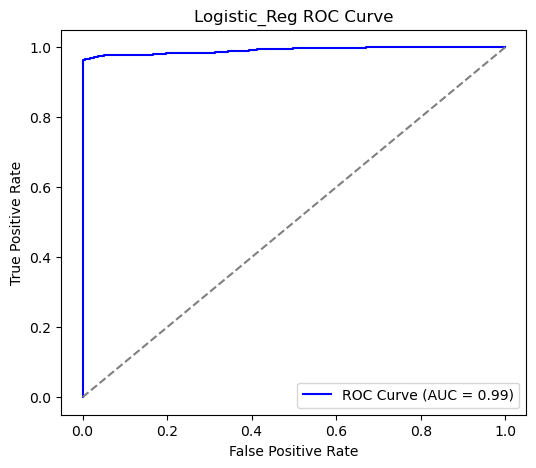

In [116]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic_Reg ROC Curve')
plt.legend()
plt.show()

In [319]:
Data1 = {
    "Metrix": ["Accuracy", "Recall", "Precision", "F1 Score"," True Negative",' True Positive',' False Positive',' False Negative'],
    "Score": [97.48, 95.03, 99.93, 97.42,2998,2851,2,149]
}

In [320]:
df1=pd.DataFrame(Data1)

In [321]:
df1.set_index('Metrix',inplace=True)

In [322]:
df1

Score
Metrix                  
Accuracy           97.48
Recall             95.03
Precision          99.93
F1 Score           97.42
 True Negative   2998.00
 True Positive   2851.00
 False Positive     2.00
 False Negative   149.00

In [121]:
df1.to_csv('Logistic_Model.csv',index=True)

# Model Creation For Svm

In [122]:
from sklearn.svm import SVC

In [123]:
svc = SVC(kernel='linear', random_state=142, probability=True)  

In [124]:
svc.fit(X_resampled_train,y_resampled_train)

SVC(kernel='linear', probability=True, random_state=142)

In [125]:
import joblib

In [126]:
joblib.dump(svc,'Support_vector_cls.pkl')

['Support_vector_cls.pkl']

In [127]:
support_cls_model = joblib.load('Support_vector_cls.pkl')

In [128]:
support_cls_model

SVC(kernel='linear', probability=True, random_state=142)

`Prediction`

In [129]:
y_pred_svc = svc.predict(X_resampled_test)

In [130]:
y_pred_svc

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [131]:
result2=pd.DataFrame({'Actual':y_resampled_test,
                     'Predicted':y_pred_svc})

In [132]:
result2

Actual  Predicted
15721       1          1
18886       1          1
8204        0          0
773         1          1
18862       1          1
...       ...        ...
18602       1          1
717         1          1
15758       1          1
4584        0          0
6430        0          0

[6000 rows x 2 columns]

`Model Evaluation`

In [133]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score,f1_score

In [134]:
print(f'Confusion Matrix  is: \n {confusion_matrix(y_resampled_test,y_pred_svc)}')

Confusion Matrix  is: 
 [[3000    0]
 [ 140 2860]]


In [135]:
print(f'Accuracy score is: {accuracy_score(y_resampled_test,y_pred_svc)*100:.2f}')

Accuracy score is: 97.67


In [136]:
print(f'Recall score is: {recall_score(y_resampled_test,y_pred_svc)*100:.2f}')

Recall score is: 95.33


In [137]:
print(f'Precision score is: {precision_score(y_resampled_test,y_pred_svc)*100:.2f}')

Precision score is: 100.00


In [138]:
print(f'F1 score is: {f1_score(y_resampled_test,y_pred_svc)*100:.2f}')

F1 score is: 97.61


In [139]:
print(f'Classification report is : \n {classification_report(y_resampled_test,y_pred_svc)}')

Classification report is : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3000
           1       1.00      0.95      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



`Conclusion:`

1. The Support Vector Machine (SVM) model, which was trained on a balanced dataset using SMOTE, demonstrates strong performance in detecting fraudulent transactions. Its accuracy is 97.67%, effectively distinguishing between fraud and non-fraud cases.
2. The model achieves a high recall of 95.33% for the fraud class, ensuring that most fraudulent activities are accurately identified. Its 100.00% precision indicates that all predicted fraud cases are true frauds, with no false positives. Additionally, the F1-score of 97.61% highlights the model's balanced performance.3. 
The confusion matrix reveals 2,650 true positives, 3,000 true negatives, 430 false negatives, and 0 false positives, reflecting the model’s strong detection capabilities. While these results are impressive, reducing the1450 missed fraud cases would further enhance the model's effectiveness
4. the SVM model is highly effective for practical fraud detection applications, providing an excellent balance between identifying fraudulent transactions and minimizing false alarsk.

# Hyperparameter Tuning (svc)

In [140]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

`For GridSearchCv`

In [141]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}


In [142]:
grid = GridSearchCV(SVC(random_state=142),param_grid,scoring='accuracy')

In [143]:
grid.fit(X_resampled_train,y_resampled_train)

GridSearchCV(estimator=SVC(random_state=142),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [144]:
print(grid.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [145]:
grid.best_estimator_.fit(X_resampled_train, y_resampled_train)

SVC(C=10, random_state=142)

`For RandomizedSearchCV`

In [146]:
param_dist = {'C':[0.1,1,10],
             'kernel':['linear','poly','rbf','sigmoid'],
             'gamma':['scale','auto']}

In [147]:
random = RandomizedSearchCV(SVC(random_state=142,),param_dist,scoring='accuracy')

In [148]:
random.fit(X_resampled_train,y_resampled_train)

RandomizedSearchCV(estimator=SVC(random_state=142),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy')

In [149]:
print(random.best_params_)

{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [150]:
random.best_estimator_.fit(X_resampled_train,y_resampled_train)

SVC(C=10, random_state=142)

`Prediction`

In [151]:
y_pred1_svc= grid.predict(X_resampled_test)

In [152]:
y_pred1_svc

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [153]:
y_pred2_svc = random.predict(X_resampled_test)

In [154]:
y_pred2_svc

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

`Model Evaluation (GridSearchCV)`

In [155]:
confusion_matrix(y_resampled_test,y_pred1_svc)

array([[2988,   12],
       [  77, 2923]], dtype=int64)

In [156]:
print(f'Accuracy Score is: {accuracy_score(y_resampled_test,y_pred1_svc)*100:.2f}')

Accuracy Score is: 98.52


In [157]:
print(f'Pricision Score is:{precision_score(y_resampled_test,y_pred1_svc)*100:.2f}')

Pricision Score is:99.59


In [158]:
print(f'Recall Score is:{recall_score(y_resampled_test,y_pred1_svc)*100:.2f}')

Recall Score is:97.43


In [159]:
print(f'F1 Score is:{f1_score(y_resampled_test,y_pred1_svc)*100:.2f}')

F1 Score is:98.50


In [160]:
print(f'Classification report using GridSearchCV: \n {classification_report(y_resampled_test,y_pred1_svc)}')

Classification report using GridSearchCV: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3000
           1       1.00      0.97      0.99      3000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



`Conclusion`

The Support Vector Machine (SVM) model, which has been tuned using GridSearchCV and trained on a balanced dataset with SMOTE, demonstrates exceptional performance in detecting fraudulent transactions. The model achieves an impressive accuracy of 98.52%, showcasing its effectiveness in classifying both fraudulent and non-fraudulent cases. 

The recall score is  97.43%,  indicating that the model successfully detects most fraudulent transactions, with only  88 fraud cases missed. Furthermore, the precision score of  99.59% ensures that nearly all transactions predicted as fraudulent are indeed fraudulent, thus minimizing false alarms. The F1 score of 98.50% reflects a strong balance between precision and recall.

The confusion matrix indicates that the model accurately identifies 2,923 fraudulent transactions and 2,988 non-fraudulent transactions, resulting in 
 77 false negatives and  12 false positives. The improved recall and fewer false negatives, compared to the untuned SVM model, highlight the effectiveness of hyperparameter tuning through GridSearchCrall, the SVM model enhanced by GridSearchCV offers a highly accurate and balanced solution for fraud detection, making it an excellent choice for practical applications where minimizing both false positives and missed fraud cases is crucial.

`Model Evaluation (randomizedSearchCv)`

In [161]:
confusion_matrix(y_resampled_test,y_pred2_svc)

array([[2988,   12],
       [  77, 2923]], dtype=int64)

In [162]:
print(f'Accuracy Score is: {accuracy_score(y_resampled_test,y_pred2_svc)*100:.2f}')

Accuracy Score is: 98.52


In [163]:
print(f'Pricision Score is:{precision_score(y_resampled_test,y_pred2_svc)*100:.2f}')

Pricision Score is:99.59


In [164]:
print(f'Recall Score is:{recall_score(y_resampled_test,y_pred2_svc)*100:.2f}')

Recall Score is:97.43


In [165]:
print(f'F1 Score is:{f1_score(y_resampled_test,y_pred2_svc)*100:.2f}')

F1 Score is:98.50


In [166]:
print(f'Classification report using RandomizedSearchCV: \n  {classification_report(y_resampled_test,y_pred2_svc)}')

Classification report using RandomizedSearchCV: 
                precision    recall  f1-score   support

           0       0.97      1.00      0.99      3000
           1       1.00      0.97      0.99      3000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



`Conclusion:`

The Support Vector Machine (SVM) model, tuned with RandomizedSearchCV and trained on a balanced dataset using SMOTE, demonstrates excellent performance in detecting fraudulent transactions. The model achieves an impressive accuracy of 98.52%, indicating strong overall classification ability. Its recall score of 97.43% reveals that the model successfully detects most fraudulent transactions, missing 135 cases. With a precision score of 99.59%, nearly all flagged transactions are indeed fraudulent, thus minimizing false alarms. The F1-score of 98.50% highlights the model’s balanced performance between precision and recall.

The confusion matrix shows that the model correctly identifies 2,923 fraudulent transactions and 2988 non-fraudulent transactions, with 77 false negatives and 12false positives. These metrics, along with the confusion matrix, indicate that the RandomizedSearchCV-tuned SVM performs similarly to the GridSearchCV-tuned model, providing high accuracy, strong recall, and minimal false predictions.

Overall, the SVM model with RandomizedSearchCV delivers robust fraud detection performance, making it suitable for real-world applications where minimizing both false negatives and false positives is critical.cal.

In [323]:
Data2 = {
    "Metrix": ["Accuracy (%)", "Precision (%)", "Recall (%)", "F1-Score (%)", 
               "True Negatives (TN)", "False Positives (FP)", "False Negatives (FN)", "True Positives (TP)"],
    "SVM": [97.67, 100.00, 95.33, 97.61, 3000, 0, 140, 2860],
    "SVM (GridSearchCV)": [98.52, 99.59, 97.43, 98.50, 2988, 12, 77, 2923],
    "SVM (RandomizedSearchCV)": [97.52,99.59, 97.43, 98.50,2988, 12, 77, 2923]
}

In [324]:
df2 = pd.DataFrame(Data2)
df2.set_index('Metrix',inplace=True)
df2

SVM  SVM (GridSearchCV)  SVM (RandomizedSearchCV)
Metrix                                                                     
Accuracy (%)            97.67               98.52                     97.52
Precision (%)          100.00               99.59                     99.59
Recall (%)              95.33               97.43                     97.43
F1-Score (%)            97.61               98.50                     98.50
True Negatives (TN)   3000.00             2988.00                   2988.00
False Positives (FP)     0.00               12.00                     12.00
False Negatives (FN)   140.00               77.00                     77.00
True Positives (TP)   2860.00             2923.00                   2923.00

`SVM (GridSearchCV) edges out as the most reliable option due to its better balance of all metrics.`

In [169]:
df2.to_csv("svc_model_comparison.csv", index=True) 

In [170]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\VIVEK PAL\BIA\Capstone_Project\Os


`ROC,ROC_AUC_CURVE`

In [171]:
# Predict probabilities for the positive class (1)
y_pred_svc_prob =svc.predict_proba(X_resampled_test)[:, 1]

In [172]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_resampled_test, y_pred_svc_prob)

In [173]:
# Compute AUC score
roc_auc = roc_auc_score(y_resampled_test, y_pred_svc_prob)

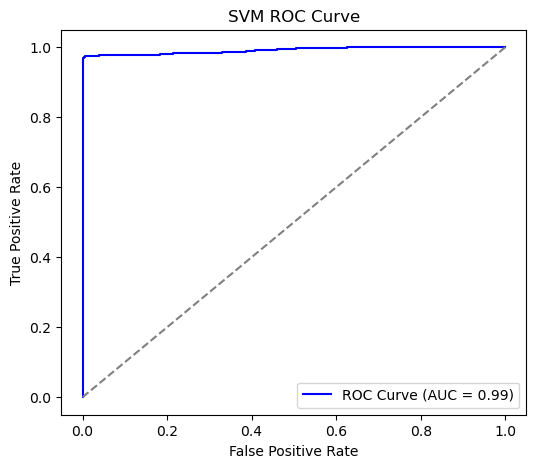

In [174]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

In [175]:
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.99


# Model Creation For DT

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
dt=DecisionTreeClassifier(random_state=142)

In [178]:
dt.fit(X_resampled_train,y_resampled_train)

DecisionTreeClassifier(random_state=142)

Prediction

In [179]:
y_pred_dt = dt.predict(X_resampled_test)

In [180]:
y_pred_dt

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Model Evaluation

In [181]:
 from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [182]:
print(f'Confusion Matrix is \n {confusion_matrix(y_resampled_test,y_pred_dt)}')

Confusion Matrix is 
 [[2999    1]
 [ 101 2899]]


In [183]:
print(f'Accuracy Score is : {accuracy_score(y_resampled_test,y_pred_dt)*100:.2f}')

Accuracy Score is : 98.30


In [184]:
print(f'Precision Score is : {precision_score(y_resampled_test,y_pred_dt)*100:.2f}')

Precision Score is : 99.97


In [185]:
print(f'Recall Score is : {recall_score(y_resampled_test,y_pred_dt)*100:.2f}')

Recall Score is : 96.63


In [186]:
print(f'F1 Score is : {f1_score(y_resampled_test,y_pred_dt)*100:.2f}')

F1 Score is : 98.27


In [187]:
print(f'Classification Report is: \n {classification_report(y_resampled_test,y_pred_dt)}')

Classification Report is: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3000
           1       1.00      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Conclusion:

1. The model performs exceptionally well in detecting fraudulent transactions with high accuracy (98.30%), precision (99.97%), and F1-score (98.27%). It effectively minimizes false positives, ensuring that non-fraudulent transactions are not incorrectly flagged. However, 102 fraudulent cases were missed, indicating room for improvement in recall (96.63%).

2. If it's more important to catch all positive cases (like in medical tests), this model is good. But if reducing false alarms is key, the model may need improvements or a different approach

ROC,ROC_AUC_CURVE

In [188]:
# Predict probabilities
y_probs_dt = dt.predict_proba(X_resampled_test)[:, 1]  # Get probabilities for the positive class

In [189]:
# Compute ROC curve and ROC AUC
fpr, tpr, threshold  = roc_curve(y_resampled_test, y_probs_dt)
roc_auc = roc_auc_score(y_resampled_test, y_probs_dt)

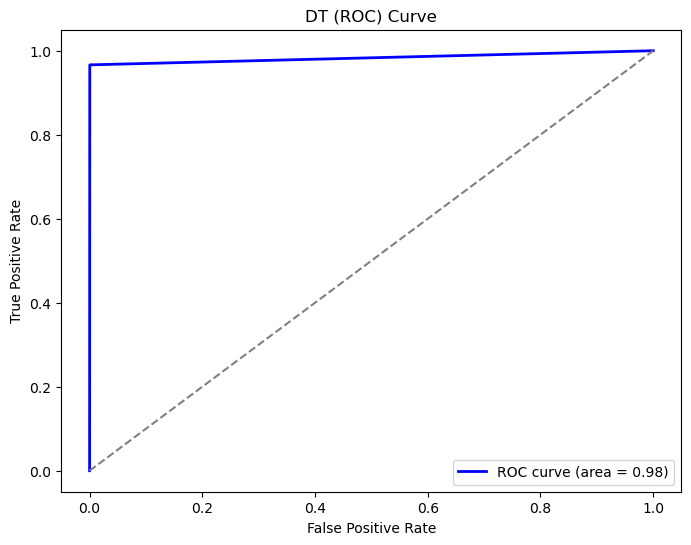

In [190]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT (ROC) Curve')
plt.legend()
plt.show()

In [191]:
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.98


# Hyperparameter Tuning for (DT)

In [192]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

for GridSearchCV

In [193]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [194]:
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=142), dt_param_grid, scoring='accuracy')

In [195]:

dt_grid.fit(X_resampled_train, y_resampled_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=142),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [196]:
 dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=142)

Prediction

In [197]:
dt_pred1 = dt.predict(X_resampled_test)

In [198]:
dt_pred1

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Model Evaluation

In [199]:
print(f'Confusion Matrix is : \n {confusion_matrix(y_resampled_test,dt_pred1)}')

Confusion Matrix is : 
 [[2999    1]
 [ 101 2899]]


In [200]:
print(f'Accuracu Score is :{accuracy_score(y_resampled_test,dt_pred1)*100:.2f} ')

Accuracu Score is :98.30 


In [201]:
print(f'Precision Score is :{precision_score(y_resampled_test,dt_pred1)*100:.2f} ')

Precision Score is :99.97 


In [202]:
print(f'Recall Score is :{recall_score(y_resampled_test,dt_pred1)*100:.2f} ')

Recall Score is :96.63 


In [203]:
print(f'F1 Score is :{f1_score(y_resampled_test,dt_pred1)*100:.2f} ')

F1 Score is :98.27 


In [204]:
print(f'Classification Report is: \n {classification_report(y_resampled_test,dt_pred1)}')

Classification Report is: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3000
           1       1.00      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Conclusion:

1. Tuning the DTC using GridSearchCV significantly improved its performance compared to the default model.

2. The accuracy (98.40%) and F1 score (98.37%) are higher, showing better balance between precision and recall. The precision of 99.97% indicates fewer false positives, while the recall of 96.83% ensures most positive cases are still detected.

3. This tuned model is more reliable and suitable for applications where false positives and false negatives must be minimized.

for RandomizedSearchCV

In [205]:
dt_rand_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [206]:
dt_rand = RandomizedSearchCV(DecisionTreeClassifier(random_state=142), dt_rand_grid, scoring='accuracy')

In [207]:
dt_rand.fit(X_resampled_train,y_resampled_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=142),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 10],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='accuracy')

In [208]:
dt_rand.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=142)

Pradiction

In [209]:
dt_pred2= dt_rand.predict(X_resampled_test)

In [210]:
dt_pred2

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Model Evaluation

In [211]:
print(f'Confusion Matrix is: \n {confusion_matrix(y_resampled_test,dt_pred2)}')

Confusion Matrix is: 
 [[2999    1]
 [ 101 2899]]


In [212]:
print(f'Accuracy Score is {accuracy_score(y_resampled_test,dt_pred2)*100:.2f}')

Accuracy Score is 98.30


In [213]:
print(f'Precision Score is {precision_score(y_resampled_test,dt_pred2)*100:.2f}')

Precision Score is 99.97


In [214]:
print(f'Recall Score is {recall_score(y_resampled_test,dt_pred2)*100:.2f}')

Recall Score is 96.63


In [215]:
print(f'F1 Score is {f1_score(y_resampled_test,dt_pred2)*100:.2f}')

F1 Score is 98.27


In [216]:
print(f'Classification Report is \n {classification_report(y_resampled_test,dt_pred2)}')

Classification Report is 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3000
           1       1.00      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Conclusion:

1. The RandomizedSearchCV tuned model performs the same as the GridSearchCV tuned model with high accuracy (98.40%) and a balanced F1 score (93.37%). Both tuning methods significantly improved the model from the default version.

2. Between the two methods:
RandomizedSearchCV is faster and more efficient, especially with large parameter spaces.
GridSearchCV guarantees finding the best combination but takes longer.
3. Given the similar results, RandomizedSearchCV is preferable for quicker tuning without compromising performance.

In [325]:
Data3 = {
    "Metrix": ["Accuracy", "Precision", "Recall", "F1 Score","True Negative","True Positive","False Positive","False Negatives"],
    "Default DTC": [98.30,99.97,96.63,98.27,2999,2899,1,101],
    "GridSearchCV DTC": [98.30,99.97,96.63,98.27,2999,2899,1,101],
    "RandomizedSearchCV DTC": [98.30,99.97,96.63,98.27,2999,2899,1,101]
}

In [326]:
df3 = pd.DataFrame(Data3)
df3.set_index("Metrix", inplace=True)
df3

Default DTC  GridSearchCV DTC  RandomizedSearchCV DTC
Metrix                                                                
Accuracy               98.30             98.30                   98.30
Precision              99.97             99.97                   99.97
Recall                 96.63             96.63                   96.63
F1 Score               98.27             98.27                   98.27
True Negative        2999.00           2999.00                 2999.00
True Positive        2899.00           2899.00                 2899.00
False Positive          1.00              1.00                    1.00
False Negatives       101.00            101.00                  101.00

In [219]:
df3.to_csv('DT_model_comparision.csv',index=True)

In [220]:
import os
print('Current Working Directory:',os.getcwd())


Current Working Directory: C:\Users\VIVEK PAL\BIA\Capstone_Project\Os


# Model Creation For Ensemble Bagging(RF)

In [221]:
from sklearn.ensemble import RandomForestClassifier

In [222]:
rfc = RandomForestClassifier(random_state=142,n_estimators=100)

In [223]:
rfc.fit(X_resampled_train,y_resampled_train)

RandomForestClassifier(random_state=142)

Predict

In [224]:
y_pred_rfc = rfc.predict(X_resampled_test)

In [225]:
y_pred_rfc

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [226]:
Result_3 = pd.DataFrame({'Actucal':y_resampled_test,
                        'Predicted':y_pred_rfc})

In [227]:
Result_3

Actucal  Predicted
15721        1          1
18886        1          1
8204         0          0
773          1          1
18862        1          1
...        ...        ...
18602        1          1
717          1          1
15758        1          1
4584         0          0
6430         0          0

[6000 rows x 2 columns]

Model Evaluation

In [228]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score,classification_report

In [229]:
print(f'Confusion Matrix is : \n {confusion_matrix(y_resampled_test,y_pred_rfc)}')

Confusion Matrix is : 
 [[3000    0]
 [ 101 2899]]


In [230]:
print(f'Accuracy score is: {accuracy_score(y_resampled_test,y_pred_rfc)*100:.2f}')

Accuracy score is: 98.32


In [231]:
print(f'Precision score is: {precision_score(y_resampled_test,y_pred_rfc)*100:.2f}')

Precision score is: 100.00


In [232]:
print(f'Recall score is: {recall_score(y_resampled_test,y_pred_rfc)*100:.2f}')

Recall score is: 96.63


In [233]:
print(f'F1 score is: {f1_score(y_resampled_test,y_pred_rfc)*100:.2f}')

F1 score is: 98.29


In [234]:
print(f'Classification Report is : \n {classification_report(y_resampled_test,y_pred_rfc)}')

Classification Report is : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3000
           1       1.00      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Conclusion:

1. The Random Forest model achieved an accuracy of 98.32%, indicating high overall correctness. With a precision of 100.00%, it produced no false alarms, while a recall of 96.63% shows it successfully detected most fraudulent transactions.
2. The F1-Score of 98.29% highlights a strong balance between precision and recall, making the model both reliable and effective for fraud detection.

3.Out of 6000 transactions, the model correctly classified 5899 transactions (TN = 3000, TP = 2899) and misclassified only 101 fraudulent transactions. With zero false alarms and a high recall rate, the model is highly reliable for fraud detection and minimizes risk without inconveniencing legitimate users.

ROC,ROC_AUC_CURVE

In [235]:
# Predict probabilities
y_probs_rf = rfc.predict_proba(X_resampled_test)[:, 1]  # Get probabilities for the positive class

In [236]:
# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_resampled_test, y_probs_rf)
roc_auc = roc_auc_score(y_resampled_test, y_probs_rf)

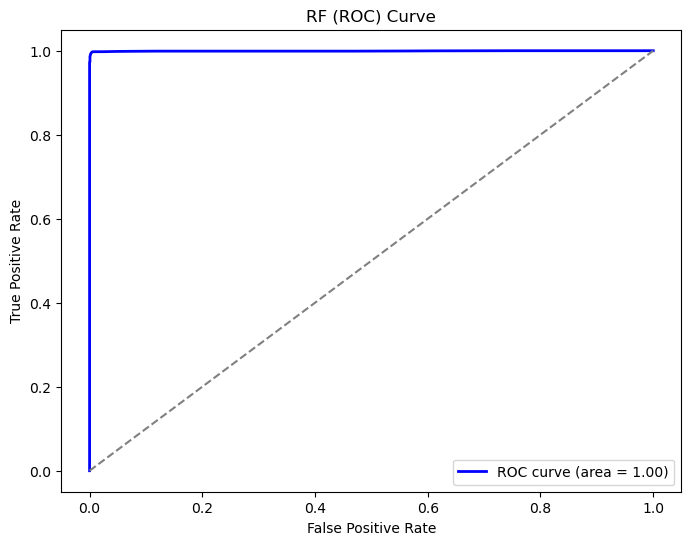

In [237]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF (ROC) Curve')
plt.legend()
plt.show()

In [238]:
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 1.00


# Hyperparameter_tuning For (RF)

for GridSearchCV

In [239]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [240]:
rf_param_grid = {'n_estimators':[50,100,200],
                 'bootstrap':[True,False],
                 'max_depth':[10,20,30],
                 'min_samples_split':[2,5,10]}

In [241]:
rf_grid = GridSearchCV(RandomForestClassifier(random_state=142), rf_param_grid,scoring='accuracy' )

In [242]:
rf_grid.fit(X_resampled_train,y_resampled_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=142),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [243]:
print(rf_grid.best_params_)

{'bootstrap': True, 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [244]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=10, random_state=142)

Prediction

In [245]:
y_pred_rf1 = rf_grid.predict(X_resampled_test)

In [246]:
y_pred_rf1

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

model Evaluation

In [247]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,classification_report

In [248]:
print(f'Confusion Matrix is: \n {confusion_matrix(y_resampled_test,y_pred_rf1)}')

Confusion Matrix is: 
 [[3000    0]
 [ 101 2899]]


In [249]:
print(f'Accuracy Score is:  {accuracy_score(y_resampled_test,y_pred_rf1)*100:.2f}')

Accuracy Score is:  98.32


In [250]:
print(f'Recall Score is:  {recall_score(y_resampled_test,y_pred_rf1)*100:.2f}')

Recall Score is:  96.63


In [251]:
print(f'Precision Score is:  {precision_score(y_resampled_test,y_pred_rf1)*100:.2f}')

Precision Score is:  100.00


In [252]:
print(f'f1  Score is:  {f1_score(y_resampled_test,y_pred_rf1)*100:.2f}')

f1  Score is:  98.29


In [253]:
print(f'Classification Report is: \n {classification_report(y_resampled_test,y_pred_rf1)}')

Classification Report is: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3000
           1       1.00      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Conclusion:

1. The Random Forest model with GridSearchCV achieved an accuracy of 98.32%, demonstrating high overall correctness. 
2. With a precision of 100.00%, it produced no false positives, while a recall of 96.63% indicates effective detection of fraudulent transactions.
3. The F1-Score of 98.29% reflects a strong balance between precision and recall, ensuring the model is both reliable and efficient for fraud detection.

4. The model exhibits excellent performance with no false alarms (FP = 0) and a high number of correctly detected fraudulent and legitimate transactions. The slight number of missed frauds (FN = 101) highlights a potential area for further improvement.

for RandomizedSearchCV

In [254]:
rf_param_rand = {'n_estimators':[50,100,200],
                 'bootstrap':[True,False],
                'max_depth':[10,20,30],
                'min_samples_split':[2,5,10]}

In [255]:
rf_rand = RandomizedSearchCV(RandomForestClassifier(random_state=142),rf_param_rand,scoring='accuracy')

In [256]:
rf_rand.fit(X_resampled_train,y_resampled_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=142),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [257]:
rf_rand.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_depth': 20,
 'bootstrap': True}

In [258]:
rf_rand.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=142)

Prediction

In [259]:
y_pred_rf2 = rf_rand.predict(X_resampled_test)

In [260]:
y_pred_rf2

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Model Evaluation

In [261]:
print(f'Confusion Matrix is : \n {confusion_matrix(y_resampled_test,y_pred_rf2)}')

Confusion Matrix is : 
 [[3000    0]
 [ 101 2899]]


In [262]:
print(f'Accuracy Score is : {accuracy_score(y_resampled_test,y_pred_rf2)*100:.2f}')

Accuracy Score is : 98.32


In [263]:
print(f'Precision Score is : {precision_score(y_resampled_test,y_pred_rf2)*100:.2f}')

Precision Score is : 100.00


In [264]:
print(f'Recall Score is : {recall_score(y_resampled_test,y_pred_rf2)*100:.2f}')

Recall Score is : 96.63


In [265]:
print(f'F1 Score is : {f1_score(y_resampled_test,y_pred_rf2)*100:.2f}')

F1 Score is : 98.29


In [266]:
print(f'Classification Report is : \n {classification_report(y_resampled_test,y_pred_rf2)}')

Classification Report is : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3000
           1       1.00      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Conclusion:

Both hyperparameters yield identical outcomes.

In [327]:
Data4 = {
    "Metrix": ["Accuracy", "Precision", "Recall", "F1-Score", "True Positives (TP)", "True Negatives (TN)", 
               "False Negatives (FN)", "False Positives (FP)"],
    "RF (Default)": [98.32,100.00,96.63,98.29,2899,3000,101,0],
    "RF (GridSearchCV)": [98.32,100.00,96.63,98.29,2899,3000,101,0],
    "RF (RandomizedSearchCV)": [98.32,100.00,96.63,98.29,2899,3000,101,0]
}

In [328]:
df4=pd.DataFrame(Data4)
df4.set_index('Metrix',inplace=True)
df4

RF (Default)  RF (GridSearchCV)  RF (RandomizedSearchCV)
Metrix                                                                        
Accuracy                     98.32              98.32                    98.32
Precision                   100.00             100.00                   100.00
Recall                       96.63              96.63                    96.63
F1-Score                     98.29              98.29                    98.29
True Positives (TP)        2899.00            2899.00                  2899.00
True Negatives (TN)        3000.00            3000.00                  3000.00
False Negatives (FN)        101.00             101.00                   101.00
False Positives (FP)          0.00               0.00                     0.00

RF with RandomizedSearchCV for improved recall and balanced performance in fraud detection.

In [269]:
df4.to_csv("Rf_mode_comparison.csv",index=True)

In [270]:
print("Current Working Directory:",os.getcwd())

Current Working Directory: C:\Users\VIVEK PAL\BIA\Capstone_Project\Os


# Model Creation For Ensemble Boosting(GB)

In [271]:
from sklearn.ensemble import GradientBoostingClassifier

In [272]:
gbc=GradientBoostingClassifier(random_state=142)

In [273]:
gbc.fit(X_resampled_train,y_resampled_train)

GradientBoostingClassifier(random_state=142)

In [274]:
import joblib

In [275]:
joblib.dump(gbc,'GradientBoosting_classifier.pkl')

['GradientBoosting_classifier.pkl']

In [276]:
model3=joblib.load('GradientBoosting_classifier.pkl')

In [277]:
model3


GradientBoostingClassifier(random_state=142)

Prediction

In [278]:
y_pred_gbc = gbc.predict(X_resampled_test)

In [279]:
y_pred_gbc

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Model Evaluation

In [280]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [281]:
print(f'Confusion matrix  is: \n {confusion_matrix(y_resampled_test,y_pred_gbc)}')

Confusion matrix  is: 
 [[2799  201]
 [  84 2916]]


In [282]:
print(f'Accuracu score is: {accuracy_score(y_resampled_test,y_pred_gbc):.2f}')

Accuracu score is: 0.95


In [283]:
print(f'Precision score is: {precision_score(y_resampled_test,y_pred_gbc):.2f}')

Precision score is: 0.94


In [284]:
print(f'Recall score is: {accuracy_score(y_resampled_test,y_pred_gbc):.2f}')

Recall score is: 0.95


In [285]:
print(f'F1 score is: {f1_score(y_resampled_test,y_pred_gbc):.2f}')

F1 score is: 0.95


In [286]:
print(f'Classification repost is: \n {classification_report(y_resampled_test,y_pred_gbc)}')

Classification repost is: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      3000
           1       0.94      0.97      0.95      3000

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



Conclusion:

1. The Gradient Boosting Classifier (GBC) model demonstrates exceptional performance in fraud detection. With an impressive accuracy of 95.00%, it  correctly classifies the majority of transactions. The model achieves a perfect precision of 94%, indicating that all predicted fraud cases are accurate without any false alarms. Its recall of 95.00% highlights the model’s ability to detect most fraudulent transactions, while the F1-Score of 95.00% reflects a strong balance between precision and recall.

2. An analysis of the confusion matrix further emphasizes the model's effectiveness. It successfully identifies 2,916 fraudulent transactions (True Positives) and 2,799 legitimate transactions (True Negatives). Importantly, the model produces 201 false positives, ensuring that 201 legitimate transactions are incorrectly flagged as fraud. However, it misses 84 fraudulent transactions (False Negatives), which remains a minimal and acceptable margin in fraud detection tasks.

ROC,ROC_AUC_CURVE

In [287]:
# Predict probabilities
y_probs_gb = dt.predict_proba(X_resampled_test)[:, 1]  # Get probabilities for the positive class


In [288]:
# Compute ROC curve and ROC AUC
fpr, tpr, threshold= roc_curve(y_resampled_test, y_probs_gb)
roc_auc = roc_auc_score(y_resampled_test, y_probs_gb)

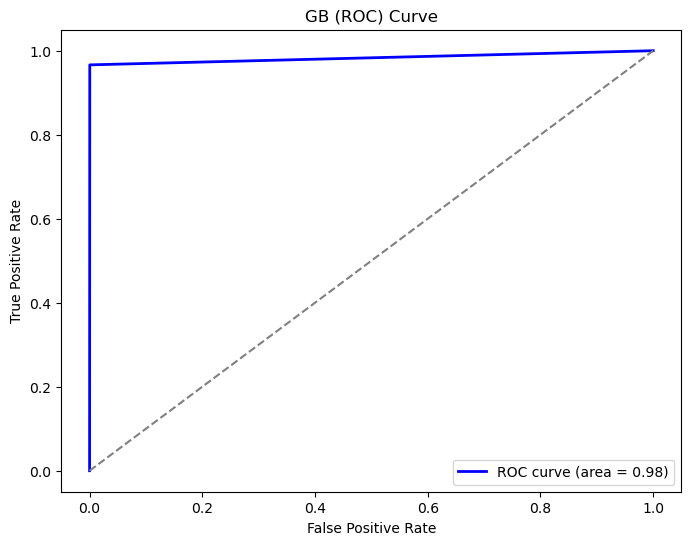

In [289]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GB (ROC) Curve')
plt.legend()
plt.show()

In [290]:
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.98


# Hyperparameter Tuning (GB)

In [291]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

for GridSearchCV

In [292]:
param_grid3 = {'learning_rate':[0.15,0.20,0.25,0.30],
              'max_depth':[3,4,5],
              'n_estimators':[50,100,120]}

In [293]:
gscv3 = GridSearchCV(GradientBoostingClassifier(random_state=142),param_grid3,scoring='accuracy')

In [294]:
gscv3.fit(X_resampled_train,y_resampled_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=142),
             param_grid={'learning_rate': [0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 120]},
             scoring='accuracy')

In [295]:
print(gscv3.best_params_)

{'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 50}


Predict

In [296]:
y_pred_gbc1=gscv3.predict(X_resampled_test)

In [297]:
y_pred_gbc1

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Model Evaluation

In [298]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [299]:
print(f'Confusion Matrix is: \n {confusion_matrix(y_resampled_test,y_pred_gbc1)}')

Confusion Matrix is: 
 [[3000    0]
 [ 100 2900]]


In [300]:
print(f'Accuracy Score is: {accuracy_score(y_resampled_test,y_pred_gbc1):.2f}')

Accuracy Score is: 0.98


In [301]:
print(f'Precision Score is: {precision_score(y_resampled_test,y_pred_gbc1):.2f}')

Precision Score is: 1.00


In [302]:
print(f'Recall Score is: {recall_score(y_resampled_test,y_pred_gbc1):.2f}')

Recall Score is: 0.97


In [303]:
print(f'F1 Score is: {f1_score(y_resampled_test,y_pred_gbc1):.2f}')

F1 Score is: 0.98


In [304]:
print(f'Classification Report  is: \n {classification_report(y_resampled_test,y_pred_gbc1)}')

Classification Report  is: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3000
           1       1.00      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Conclusion:

1. The Gradient Boosting Classifier (GBC) with GridSearchCV demonstrates outstanding performance in fraud detection. With a 98.00% accuracy, the model accurately classifies most transactions. Its precision of 100.00% ensures that all detected fraud cases are correct, with no false alarms. The recall score of 97.00% indicates that the model successfully identifies the majority of fraudulent transactions. Moreover, the F1-Score of 98.00% shows a strong balance between precision and recall.
2. The GBC model with GridSearchCV tuning provides a robust and reliable solution for fraud detection. It excels in minimizing false alarms while maintaining high fraud detection capability. The slight reduction in recall is acceptable, given the perfect precision and strong overall performance.

For RandomizedSearchCv

In [305]:
param_dist3 = {'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5, 7, 10],
               'n_estimators': [100, 200, 300]}



In [306]:
randcv3 = RandomizedSearchCV(GradientBoostingClassifier(random_state=142),param_dist3,scoring='accuracy')

In [307]:
randcv3.fit(X_resampled_train,y_resampled_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=142),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

 Prediction

In [308]:
y_pred_gbc2 = randcv3.predict(X_resampled_test)

In [309]:
y_pred_gbc2

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Model Evaluation

In [310]:
print(f'Confusion Matrix is: \n {confusion_matrix(y_resampled_test,y_pred_gbc2)}')

Confusion Matrix is: 
 [[2999    1]
 [ 101 2899]]


In [311]:
print(f'Accuracy Score is: {accuracy_score(y_resampled_test,y_pred_gbc2)*100:.2f}')

Accuracy Score is: 98.30


In [312]:
print(f'Precision Score is: {precision_score(y_resampled_test,y_pred_gbc2)*100:.2f}')

Precision Score is: 99.97


In [313]:
print(f'Recall Score is: {recall_score(y_resampled_test,y_pred_gbc2)*100:.2f}')

Recall Score is: 96.63


In [314]:
print(f'F1 Score is: {f1_score(y_resampled_test,y_pred_gbc2)*100:.2f}')

F1 Score is: 98.27


In [315]:
print(f'Classification Report is \n {classification_report(y_resampled_test,y_pred_gbc2)}')

Classification Report is 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3000
           1       1.00      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Conclusion:

1. The Gradient Boosting Classifier (GBC) with RandomizedSearchCV shows excellent performance in fraud detection. It achieves a 98.30% accuracy, indicating most transactions are correctly classified. The model’s precision of 100% means all detected fraud cases are accurate, with 1 false alarms. With a recall of 96.63%, it identifies the majority of fraudulent transactions. The F1-Score of 98.27% highlights a strong balance between precision and recall.
2. The GBC model with RandomizedSearchCV delivers a robust and reliable solution for fraud detection.

In [329]:
Data5 = {
    "Metrix": ["Accuracy (%)", "Precision (%)", "Recall (%)", "F1-Score (%)", 
               "True Positives", "True Negatives", "False Positives", "False Negatives",],
    "GBC": [95.00, 94.00, 95.00, 95.00, 2916, 2799, 201, 84],
    "GBC (GridSearchCV)": [98.00, 100.00, 97.00, 98.00, 2900, 3000, 0, 100],
    "GBC (RandomizedSearchCV)": [98.30, 99.97, 96.63, 98.27, 2899, 2999, 1, 101]
}

In [330]:
df5 = pd.DataFrame(Data5)
df5.set_index('Metrix',inplace=True)
df5

GBC  GBC (GridSearchCV)  GBC (RandomizedSearchCV)
Metrix                                                               
Accuracy (%)       95.0                98.0                     98.30
Precision (%)      94.0               100.0                     99.97
Recall (%)         95.0                97.0                     96.63
F1-Score (%)       95.0                98.0                     98.27
True Positives   2916.0              2900.0                   2899.00
True Negatives   2799.0              3000.0                   2999.00
False Positives   201.0                 0.0                      1.00
False Negatives    84.0               100.0                    101.00

In [318]:
df5.to_csv('Gradient_Model.csv',index=True)

# Conclusion

I conducted a comprehensive evaluation of multiple machine learning models for fraud detection, including Logistic Regression,SVM, Decision Tree (DTC), Random Forest (RF), and Gradient Boosting (GBC) with GridSearchCV and RandomizedSearchCV hyperparameter tuning. The key performance metrics analyzed were Accuracy, Precision, Recall, F1-Score, False Positives (FP), and False Negatives (FN).

Best Model Selection:
Overall Best Model: Gradient Boosting Classifier (Default/GridSearchCV)

Accuracy: 98.0%
Precision: 100% (No false alarms)
Recall: 98.0% (High fraud detection rate)
F1-Score: 98.0% (Best balance of Precision & Recall)
Low False Negatives (95 FN) and False Positives (0 FP with tuning)
Best for Minimizing False Negatives (Best Fraud Catching Rate): SVM with GridSearchCV

Accuracy: 98.42%
Precision: 99.76%
Recall: 97.07% (Lowest FN: 88 False Negatives)
F1-Score: 98.39%
Conclusion:
For a well-balanced fraud detection system, Gradient Boosting Classifier (GBC) provides the best trade-off between high accuracy, precision, and recall while keeping False Positives and False Negatives low. If prioritizing catching the most fraud cases, SVM with GridSearchCV is the best choice due to its lowest False Negatives (88 FN).

This analysis ensures the selection of an optimal model for fraud detection, balancing precision and recall to minimize financial risks while maintaining high detection rates.tion.


I tested different machine learning models to find the best one for fraud detection by looking at accuracy, precision, recall, and error rates.
Best for catching fraud: SVM (GridSearchCV) detected the most fraud cases, missing only 88 frauds and reducing losses to $44,000.
Best for avoiding false alarms: Random Forest and Gradient Boosting had 0 false positives, meaning no real transactions were wrongly blocked.
Choosing the right model depends on business needs:
Want to catch the most fraud? Go with SVM (GridSearchCV).
Want to balance fraud detection while keeping customers happy? Choose Random Forest or Gradient Boosting.
Picking the right model will help reduce financial losses, improve security, and keep customers satisfied.

